In [45]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()
import os.path
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 200

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Project Details

## Parameters

In [46]:
taxo_tests=['genus','family']
db_folder='Barcode_DB/'
min_test=1
min_test_invalid=2
genes_df = pd.DataFrame(list(zip(
    ['BOLD_pln_rbcLa','BOLD_pln_matK',
     'NCBI_pln_trnL', 'NCBI_pln_trnH',
     'NCBI_pln_18s','NCBI_pln_plastome'], 
    [400,400,400,200,100,1000,1000],
    [90,90,90,90,90,90,0])),
    columns =['gene', 'min_len','min_cov'])
genes_df

,gene,min_len,min_cov
0,BOLD_pln_rbcLa,400,90
1,BOLD_pln_matK,400,90
2,NCBI_pln_trnL,400,90
3,NCBI_pln_trnH,200,90
4,NCBI_pln_18s,100,90
5,NCBI_pln_plastome,1000,90


## 1KP

In [47]:
project_name='OKP'
samples_df = pd.read_csv(project_name + '/' + project_name + '_dbcheck.csv')
samples_df['filename'] = samples_df.Sample
print(samples_df.columns)
sdf_col_keep= ['Sample','Ini_Species', 'Ini_Genus', 'Ini_Family','rank',
            'species','genus','family','numSequences','sumLengthOfContigs',
            '18S misplacement','Worrisome contamination','Unconfirmed contamination',
            'taxonomic_status']
print(samples_df.shape)
samples_df[:2][sdf_col_keep]

Index(['Sample', 'Ini_Species', 'Ini_Family', 'Ini_Genus', 'combined',
       '18S misplacement', 'Worrisome contamination',
       'Unconfirmed contamination', 'okp_raw', 'okp_blastcut', 'numSequences',
       'sumLengthOfContigs', 'min_len', 'max_len', 'In_Pilot', 'Ini_sci_name',
       'sci_name_query', 'Similar_match', 'Duplicates', 'kew_id', 'family',
       'genus', 'species', 'infraspecies', 'sci_name', 'authors', 'rank',
       'taxonomic_status', 'Ini_kew_id', 'Ini_taxonomic_status',
       'Duplicate_type', 'gen_inDB_BOLD_pln_rbcLa', 'fam_inDB_BOLD_pln_rbcLa',
       'gen_inDB_BOLD_pln_matK', 'fam_inDB_BOLD_pln_matK',
       'gen_inDB_NCBI_pln_trnL', 'fam_inDB_NCBI_pln_trnL',
       'gen_inDB_NCBI_pln_trnH', 'fam_inDB_NCBI_pln_trnH',
       'gen_inDB_NCBI_pln_18s', 'fam_inDB_NCBI_pln_18s',
       'gen_inDB_NCBI_pln_plastome', 'fam_inDB_NCBI_pln_plastome', 'filename'],
      dtype='object')
(767, 44)


,Sample,Ini_Species,Ini_Genus,Ini_Family,rank,species,genus,family,numSequences,sumLengthOfContigs,18S misplacement,Worrisome contamination,Unconfirmed contamination,taxonomic_status
0,AALA,Meliosma cuneifolia,Meliosma,Sabiaceae,SPECIES,cuneifolia,Meliosma,Sabiaceae,321,206542,0.0,0.0,0.0,Accepted
1,AAXJ,Atriplex prostrata,Atriplex,Chenopodiaceae,SPECIES,NaN,Atriplex,Amaranthaceae,345,335530,0.0,0.0,0.0,Accepted


## PAFTOL OCT

In [48]:
# project_name='PAFTOL_OCT'
# blast_folder = project_name + '/out_blast'
# samples_df = pd.read_csv(project_name + '/' + project_name + '_dbcheck.csv')
# samples_df['idSequencing'] = samples_df['Sample']
# samples_df['Sample'] = samples_df['Sample'].apply(lambda x: 'PAFTOL_' + str(x).zfill(6))
# print(samples_df.columns)
# sdf_col_keep= ['Sample', 'idSequencing', 'idPaftol', 'Ini_sci_name', 'species', 'family', 'genus', 
#                'taxonomic_status','Duplicate_type']
# print(samples_df.shape)
# samples_df[:2][sdf_col_keep]

In [49]:
samples_df.isna().sum()

Sample                          0
Ini_Species                     0
Ini_Family                      0
Ini_Genus                       0
combined                        0
18S misplacement               18
Worrisome contamination        18
Unconfirmed contamination      18
okp_raw                         0
okp_blastcut                    0
numSequences                    0
sumLengthOfContigs              0
min_len                         0
max_len                         0
In_Pilot                        0
Ini_sci_name                    0
sci_name_query                  0
Similar_match                 761
Duplicates                      0
kew_id                          0
family                          0
genus                           0
species                        79
infraspecies                  753
sci_name                        0
authors                         5
rank                            0
taxonomic_status                0
Ini_kew_id                    655
Ini_taxonomic_

In [50]:
# print(samples_df.shape)
# samples_df=samples_df[samples_df.family.isna()==False]
# print(samples_df.shape)
# samples_df=samples_df[samples_df.genus.isna()==False]
# print(samples_df.shape)

## Prep sample list

### 1KP

In [51]:
# samples_df = pd.read_csv('../1kp/1kp_768_wcvp.csv')
# print(samples_df.shape)
# samples_df.columns

### PAFTOL OCT

In [52]:
# samples_df=pd.read_csv('../paftol_samples/PAFTOL_DEC_DF_wcvp.csv')
# print(samples_df.shape)
# print(samples_df.columns)
# unresolved=pd.read_csv('../paftol_samples/PAFTOL_DEC_DF_unresolved.csv')
# print(unresolved.shape)
# unresolved = unresolved[['Sample', 'Source', 'idPaftol', 'Order', 'Ini_Family', 'Ini_Genus', 
#                          'Ini_Species', 'Ini_sci_name']]
# unresolved = unresolved.rename(columns=
#             {'Ini_Family':'family','Ini_Genus':'genus','Ini_Species':'species',
#             'Ini_sci_name':'sci_name'})
# unresolved['Duplicate_type']='Unresolved'
# samples_df = pd.concat([samples_df,unresolved])
# print(samples_df.shape)
# print(samples_df.columns)

## Check if species are in databases

In [53]:
# for idb in genes_df.gene:
#     gene_db = pd.read_csv(db_folder + idb + '_TAXO.csv')
#     for itaxo in taxo_tests:
#         print(idb, itaxo)
#         itx = str(itaxo)[:3]
#         samples_df[itx + '_inDB_' + idb]= \
#             samples_df.progress_apply(lambda row: row[itaxo] in list(gene_db[itaxo]),axis=1)
# samples_df.to_csv(project_name + '/' + project_name + '_dbcheck.csv',index=False)

In [54]:
for idx, row in genes_df.iterrows():
    for itaxo in taxo_tests:
        itx = str(itaxo)[:3]
        genes_df.loc[idx,'NSample_' + itaxo + '_inDB'] = samples_df[itx + '_inDB_' + row.gene].sum()
        genes_df.loc[idx,'pc_' + itaxo + '_inDB'] = \
            round(samples_df[samples_df[itx + '_inDB_' + row.gene]][itaxo].nunique() / samples_df[itaxo].nunique() * 100,1)
print(genes_df.mean().round(1).to_dict())
genes_df

{'min_len': 416.7, 'min_cov': 90.0, 'NSample_genus_inDB': 536.8, 'pc_genus_inDB': 67.2, 'NSample_family_inDB': 694.3, 'pc_family_inDB': 82.5}


,gene,min_len,min_cov,NSample_genus_inDB,pc_genus_inDB,NSample_family_inDB,pc_family_inDB
0,BOLD_pln_rbcLa,400,90,502.0,60.0,629.0,73.6
1,BOLD_pln_matK,400,90,659.0,83.8,685.0,92.9
2,NCBI_pln_trnL,400,90,671.0,84.8,731.0,87.7
3,NCBI_pln_trnH,200,90,392.0,50.1,676.0,71.0
4,NCBI_pln_18s,100,90,506.0,64.3,745.0,92.6
5,NCBI_pln_plastome,1000,90,491.0,59.9,700.0,77.0


# Blast Output Processing

In [55]:
def get_blast_results(data_df, blast_results, gene, sort_col='pident', taxo_tests = ['species','genus','family']):
    # Initiate new columns
    data_df['Nmatch_' + gene]=np.nan; data_df['NseqID_' + gene]=np.nan; data_df['Nspecies_' + gene]=np.nan;
    for itaxo in taxo_tests:
        itx = str(itaxo)[:3]
        data_df[itx + '_match_' + gene] = np.nan;  data_df[itx + '_rank_' + gene] = np.nan;
        data_df[itx + '_pid_' + gene] = np.nan; data_df[itx + '_len_' + gene] = np.nan; 
        data_df[itx + '_scov_' + gene] = np.nan; data_df[itx + '_qcov_' + gene] = np.nan; 
        data_df['best_' + itx + '_' + gene] = np.nan; 
    data_df['best_pid_' + gene] = np.nan; data_df['best_score_' + gene] = np.nan; 
    data_df['best_scov_' + gene] = np.nan; data_df['best_qcov_' + gene] = np.nan; 
    
    # Loop on all samples
    for idx, row in tqdm(data_df.iterrows(),total=data_df.shape[0]): 
        # Check if there are matches for that sample
        blast_sample=blast_results[blast_results.Sample==row.Sample]
        # Proceed if at least 1 match
        if blast_sample.shape[0]>0:
            blast_sample=blast_sample.sort_values([sort_col],ascending=False).reset_index().drop(columns='index')
            data_df.loc[idx,'Nmatch_' + gene]=blast_sample.shape[0]
            data_df.loc[idx,'NseqID_' + gene]=blast_sample.qseqid.nunique()

            #Calculate rank
            blast_sample['rank']=blast_sample[sort_col].rank(ascending=False,method='min')
            # Drop duplicates by species name
#             blast_best = blast_sample.drop_duplicates(subset=['species'], keep='first').reset_index().drop(columns='index')
            data_df.loc[idx,'Nspecies_' + gene]=blast_sample.species.nunique()
    
            # Tests per taxonomic rank
            for itaxo in taxo_tests:
                itx = str(itaxo)[:3]
                # Check if sample as taxa (not nan) AND that the taxa is in the DB
                if (data_df.loc[idx,itaxo] == data_df.loc[idx,itaxo]) & (data_df.loc[idx,itx + '_inDB_' + gene]==True):
                    data_df.loc[idx,itx + '_match_' + gene] = data_df.loc[idx,itaxo] in list(blast_sample[itaxo])

                    # if there is a match, collect rank, pc identity, matching length and coverage
                    if data_df.loc[idx,itx + '_match_' + gene]==True: 
                        idx_tax = blast_sample[blast_sample[itaxo] == data_df.loc[idx,itaxo]].index

#                         data_df.loc[itx + '_rank_' + gene] = idx_tax[0] + 1 # +1 Because python starts at 0
                        data_df.loc[idx, itx + '_rank_' + gene] = blast_sample.loc[idx_tax[0],'rank']
                        data_df.loc[idx, itx + '_pid_' + gene] = blast_sample.loc[idx_tax[0],'pident']
                        data_df.loc[idx, itx + '_len_' + gene] = blast_sample.loc[idx_tax[0],'length']
                        data_df.loc[idx, itx + '_scov_' + gene] = blast_sample.loc[idx_tax[0],'scov']
                        data_df.loc[idx, itx + '_qcov_' + gene] = blast_sample.loc[idx_tax[0],'qcov']
                    # Collect best hit taxa
                    data_df.loc[idx, 'best_' + itx + '_' + gene] = blast_sample.loc[0,itaxo]
                    # Collect best hit
            data_df.loc[idx, 'best_pid_' + gene] = blast_sample.loc[0,'pident']
            data_df.loc[idx, 'best_score_' + gene] = blast_sample.loc[0,'bitscore']
            data_df.loc[idx, 'best_scov_' + gene] = blast_sample.loc[0,'scov']
            data_df.loc[idx, 'best_qcov_' + gene] = blast_sample.loc[0,'qcov']

            del blast_sample
    return data_df

In [56]:
def get_validation_data(data_df, blast_folder, gene, taxo_tests=['species','genus','family'], sort_col='pident'):
    
    # Load results
    print('Processing blast results ' + gene + '...',end='')
    try:
        blast_results = pd.read_csv(blast_folder + '/OutBlast_' + gene + '.csv',encoding='utf-8')
    except:
        print('error loading ' + blast_folder + '/OutBlast_' + gene + '.csv')
    
    # Process BLAST results
    blast_out_df = get_blast_results(data_df = data_df, blast_results = blast_results, 
                                     gene = gene, sort_col = sort_col, taxo_tests = taxo_tests)
    
    col_gene=list(blast_out_df.columns[blast_out_df.columns.str.contains(gene)])
    col_gene.append('Sample')
    
    return blast_out_df[col_gene]

In [57]:
results_df=samples_df[sdf_col_keep].copy()
for idx, gene in genes_df.iterrows():
    out_df = get_validation_data(samples_df, blast_folder = project_name, gene = gene.gene,
                                 taxo_tests= taxo_tests, sort_col='pident')
    out_df.to_csv(project_name + '/' + project_name + '_results_' + gene.gene + '.csv', index=False)
    results_df=pd.merge(left = results_df, right = out_df, how='left', on = 'Sample')

Processing blast results BOLD_pln_rbcLa...

100%|████████████████████████████████████████████████████████████████████████████████| 767/767 [00:48<00:00, 15.77it/s]


Processing blast results BOLD_pln_matK...

100%|████████████████████████████████████████████████████████████████████████████████| 767/767 [00:18<00:00, 42.39it/s]


Processing blast results NCBI_pln_trnL...

  2%|█▎                                                                              | 13/767 [00:00<00:06, 120.69it/s]

Processing blast results NCBI_pln_trnH...

100%|███████████████████████████████████████████████████████████████████████████████| 767/767 [00:05<00:00, 135.20it/s]


Processing blast results NCBI_pln_18s...

100%|████████████████████████████████████████████████████████████████████████████████| 767/767 [01:51<00:00,  6.86it/s]


Processing blast results NCBI_pln_plastome...

100%|████████████████████████████████████████████████████████████████████████████████| 767/767 [05:00<00:00,  2.55it/s]


In [58]:
results_df.to_csv(project_name + '/' + project_name + '_ALLresults.csv', index=False)

In [59]:
print(list(results_df.columns))

['Sample', 'Ini_Species', 'Ini_Genus', 'Ini_Family', 'rank', 'species', 'genus', 'family', 'numSequences', 'sumLengthOfContigs', '18S misplacement', 'Worrisome contamination', 'Unconfirmed contamination', 'taxonomic_status', 'gen_inDB_BOLD_pln_rbcLa', 'fam_inDB_BOLD_pln_rbcLa', 'Nmatch_BOLD_pln_rbcLa', 'NseqID_BOLD_pln_rbcLa', 'Nspecies_BOLD_pln_rbcLa', 'gen_match_BOLD_pln_rbcLa', 'gen_rank_BOLD_pln_rbcLa', 'gen_pid_BOLD_pln_rbcLa', 'gen_len_BOLD_pln_rbcLa', 'gen_scov_BOLD_pln_rbcLa', 'gen_qcov_BOLD_pln_rbcLa', 'best_gen_BOLD_pln_rbcLa', 'fam_match_BOLD_pln_rbcLa', 'fam_rank_BOLD_pln_rbcLa', 'fam_pid_BOLD_pln_rbcLa', 'fam_len_BOLD_pln_rbcLa', 'fam_scov_BOLD_pln_rbcLa', 'fam_qcov_BOLD_pln_rbcLa', 'best_fam_BOLD_pln_rbcLa', 'best_pid_BOLD_pln_rbcLa', 'best_score_BOLD_pln_rbcLa', 'best_scov_BOLD_pln_rbcLa', 'best_qcov_BOLD_pln_rbcLa', 'gen_inDB_BOLD_pln_matK', 'fam_inDB_BOLD_pln_matK', 'Nmatch_BOLD_pln_matK', 'NseqID_BOLD_pln_matK', 'Nspecies_BOLD_pln_matK', 'gen_match_BOLD_pln_matK', 'ge

In [60]:
results_df = pd.read_csv(project_name + '/' + project_name + '_ALLresults.csv')

# Results Report

In [61]:
def gene_test(data_df, itaxo, gene, max_rank = None, verbose=False):
   
    itx=itaxo[:3]; Vvar='Status'
    # by default, no sample was tested 
    data_df[Vvar] = ''
    
    indb = data_df[itx + '_inDB_' + gene]
    has_blast = data_df['Nmatch_' + gene].isna() == False

    pass_match = data_df[itx + '_match_' + gene]==True
    pass_rank = data_df[itx + '_rank_' + gene] <= max_rank
    
    # If the sample taxa is in db, has match, pass mathc, pass id and pass rank => Pass
    data_df.loc[(indb==True) & (has_blast==True) & (pass_match==True) & (pass_rank==True),Vvar] = 'Pass'
    
    # If the sample taxa is in db, has match but not match to the right taxa => fail_match
    data_df.loc[(indb==True) & (has_blast==True) & (pass_match==False),Vvar] = 'Fail_match'
    
    # If the sample taxa is in db, in match, pass id but fail rank => fail_rank
    data_df.loc[(indb==True) & (has_blast==True) & (pass_match==True) & (pass_rank==False),Vvar] = 'Fail_rank'
    
    # If the sample taxa is not in DB => NotinDB
    data_df.loc[(indb==False),Vvar] = 'NotinDB'
    # If the sample taxa is in DB but has no blast => NoBlast
    data_df.loc[(indb==True) & (has_blast==False),Vvar] = 'NoBlast'

    if verbose:
        print(data_df.groupby(Vvar).size())
        
    return data_df[Vvar]

In [62]:
#Validation
for gene in genes_df.gene:
    results_df['VAgen_' + gene] = gene_test(results_df, 'genus', gene, max_rank = 1)
    results_df['VAfam_' + gene] = gene_test(results_df, 'family', gene, max_rank = 1)

In [63]:
stats_tests=pd.DataFrame(columns=['gene','rank','Pass','Fail_match','Fail_rank','NoBlast','NotinDB']); idx=0
for gene in genes_df.gene:
    for itaxo in taxo_tests:   
        itx = str(itaxo)[:3]
        stats_tests.loc[idx,'gene'] = gene; 
        stats_tests.loc[idx,'rank'] = itaxo;
        stats_tests.loc[idx,'Pass'] = (results_df['VA' + itx + '_' + gene] == 'Pass').sum()
        stats_tests.loc[idx,'Fail_match'] = (results_df['VA' + itx + '_' + gene] == 'Fail_match').sum()
        stats_tests.loc[idx,'Fail_rank'] = (results_df['VA' + itx + '_' + gene] == 'Fail_rank').sum()
        stats_tests.loc[idx,'NoBlast'] = (results_df['VA' + itx + '_' + gene] == 'NoBlast').sum()
        stats_tests.loc[idx,'NotinDB'] = (results_df['VA' + itx + '_' + gene] == 'NotinDB').sum()
        idx = idx + 1
print(stats_tests)

                 gene    rank Pass Fail_match Fail_rank NoBlast NotinDB
0      BOLD_pln_rbcLa   genus  430         16        37      19     265
1      BOLD_pln_rbcLa  family  564         18        13      34     138
2       BOLD_pln_matK   genus  390         68        23     178     108
3       BOLD_pln_matK  family  470         26         1     188      82
4       NCBI_pln_trnL   genus  500         36        26     109      96
5       NCBI_pln_trnL  family  576         12         2     141      36
6       NCBI_pln_trnH   genus  142         40         8     202     375
7       NCBI_pln_trnH  family  199         47        15     415      91
8        NCBI_pln_18s   genus  354         42        73      37     261
9        NCBI_pln_18s  family  609         25        60      51      22
10  NCBI_pln_plastome   genus  451          5        34       1     276
11  NCBI_pln_plastome  family  636          7        55       2      67


In [64]:
pp = PdfPages(project_name + '/' + project_name + '_Barcoding_Validation_Figures.pdf')

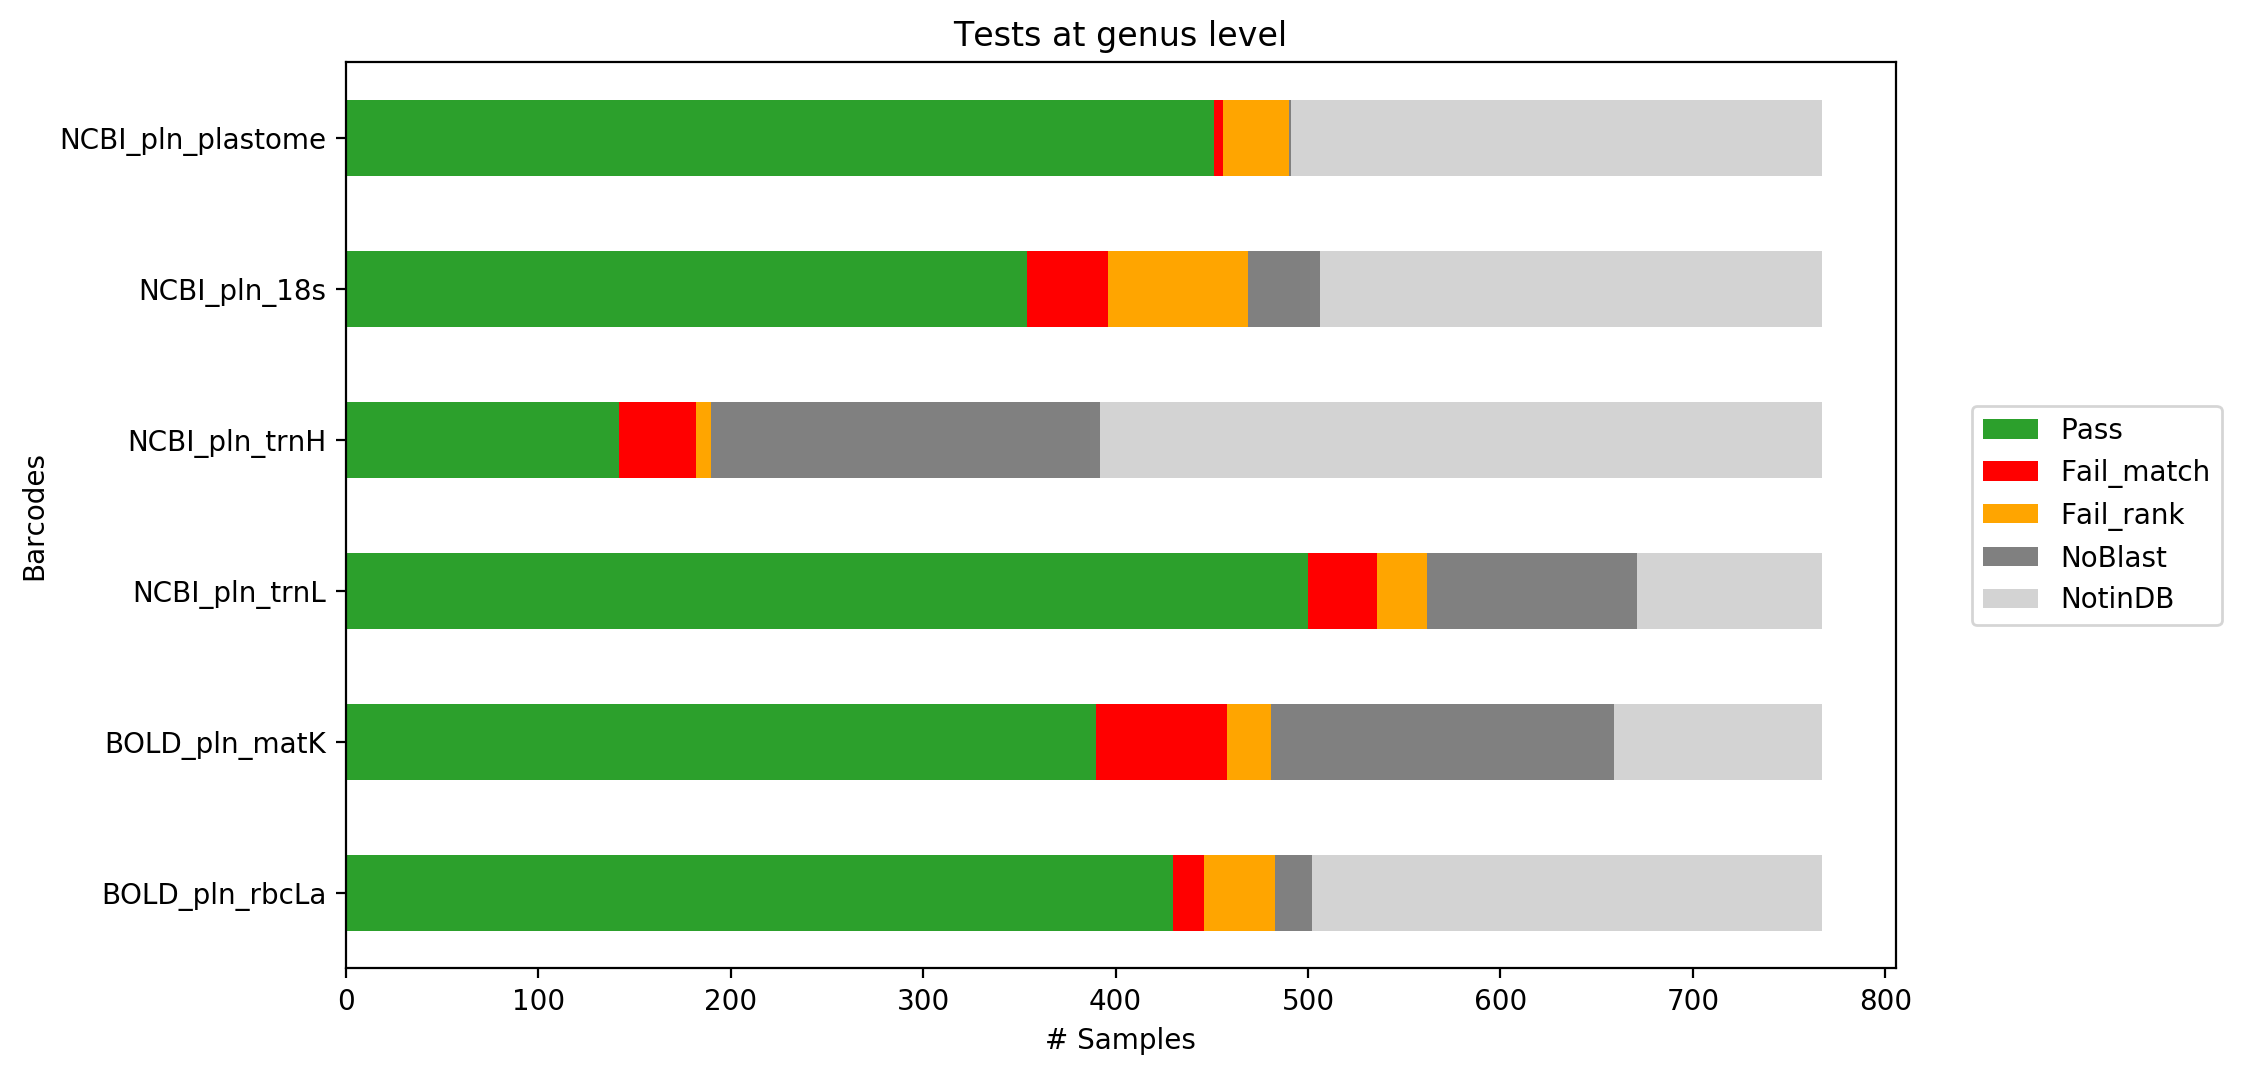

In [65]:
ax = stats_tests[stats_tests['rank']=='genus'].set_index(['gene']).plot.barh(stacked=True,
        color=['#2CA02C', 'r', 'orange', 'grey', 'lightgrey'])
ax.set_title('Tests at genus level')
ax.set_ylabel('Barcodes')
ax.set_xlabel('# Samples')
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left");
pp.savefig()

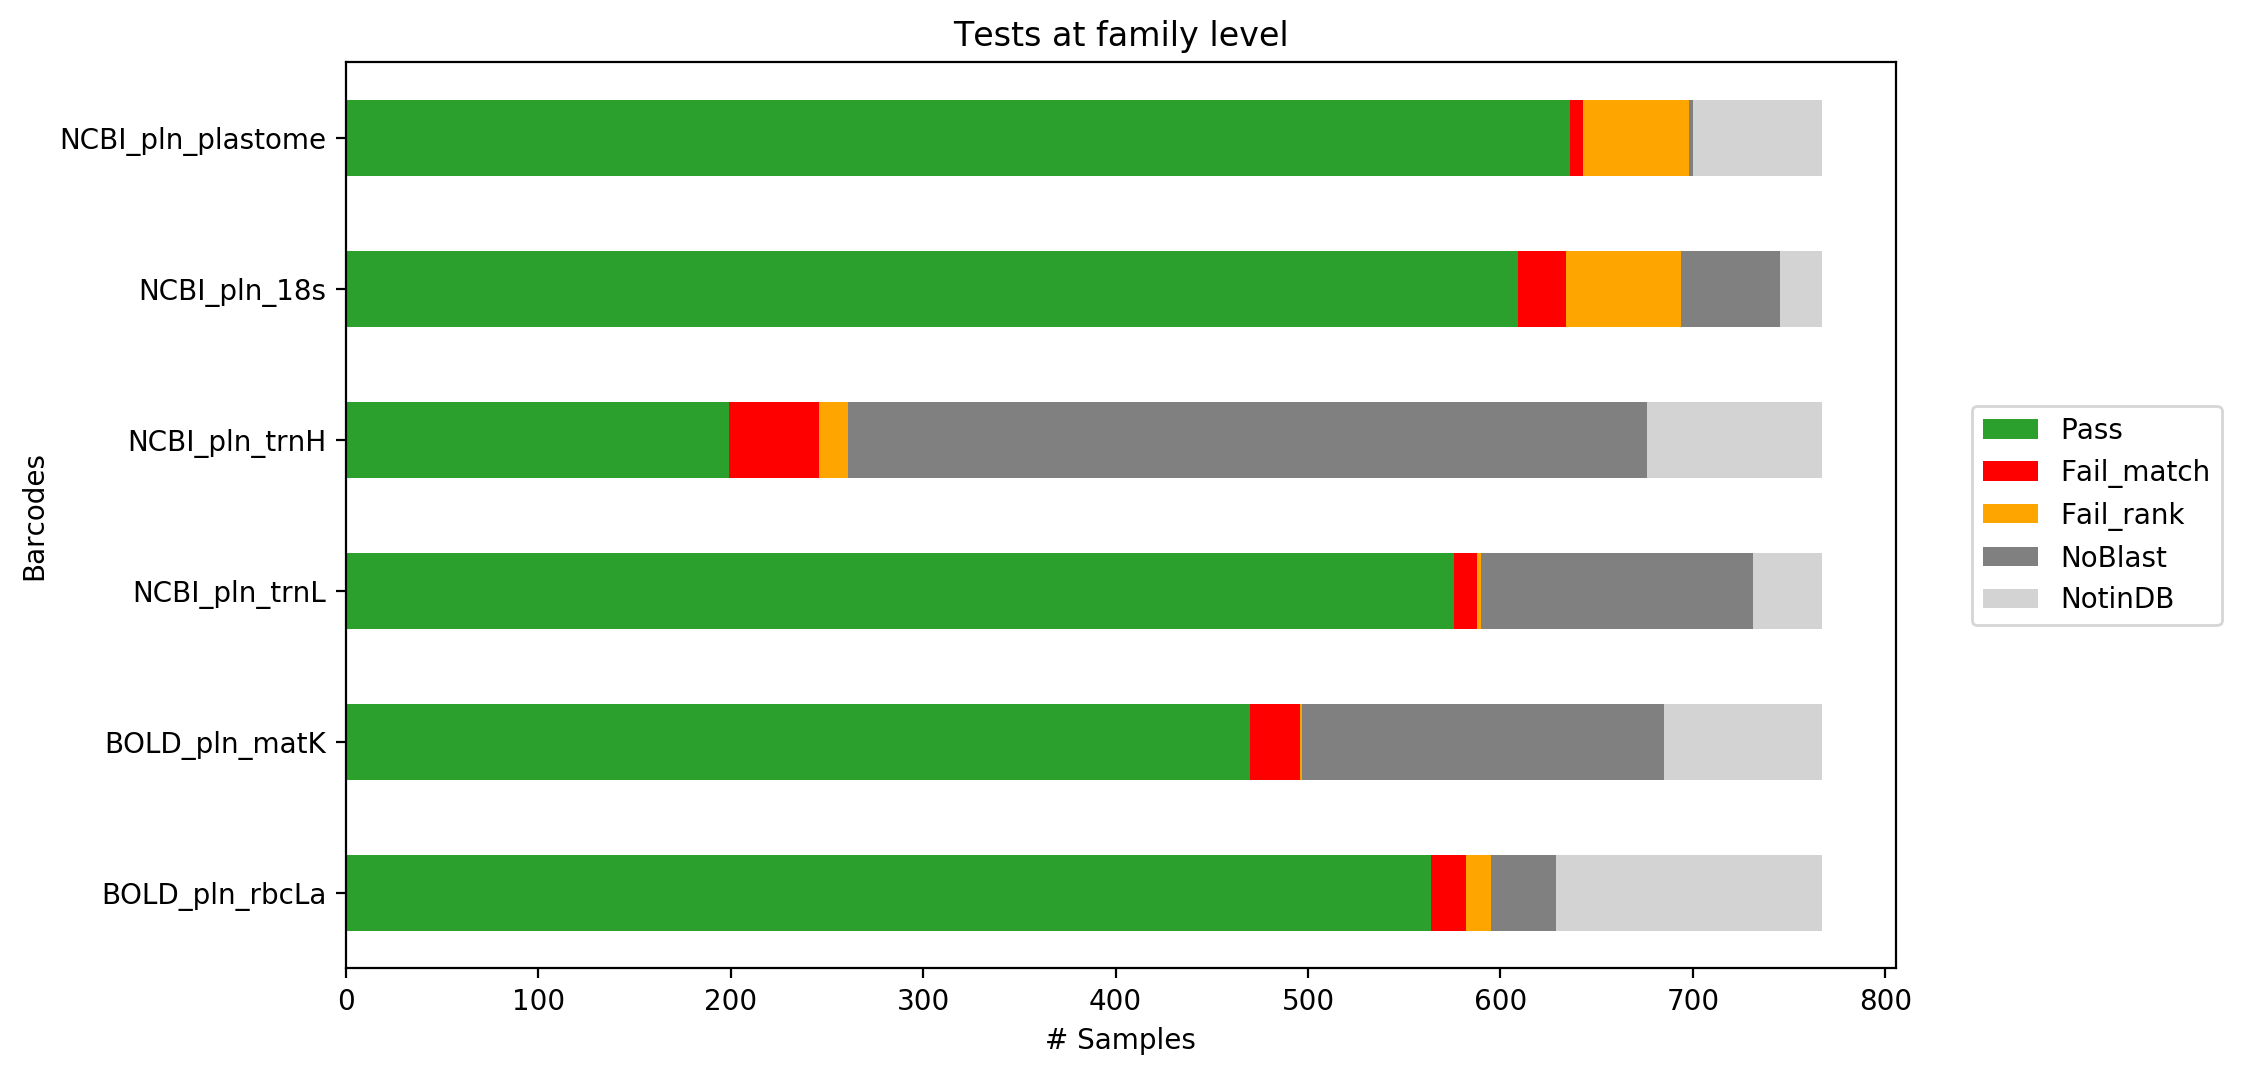

In [66]:
ax = stats_tests[stats_tests['rank']=='family'].set_index(['gene']).plot.barh(stacked=True,
        color=['#2CA02C', 'r', 'orange', 'grey', 'lightgrey'])
ax.set_title('Tests at family level')
ax.set_ylabel('Barcodes')
ax.set_xlabel('# Samples')
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left");
pp.savefig()

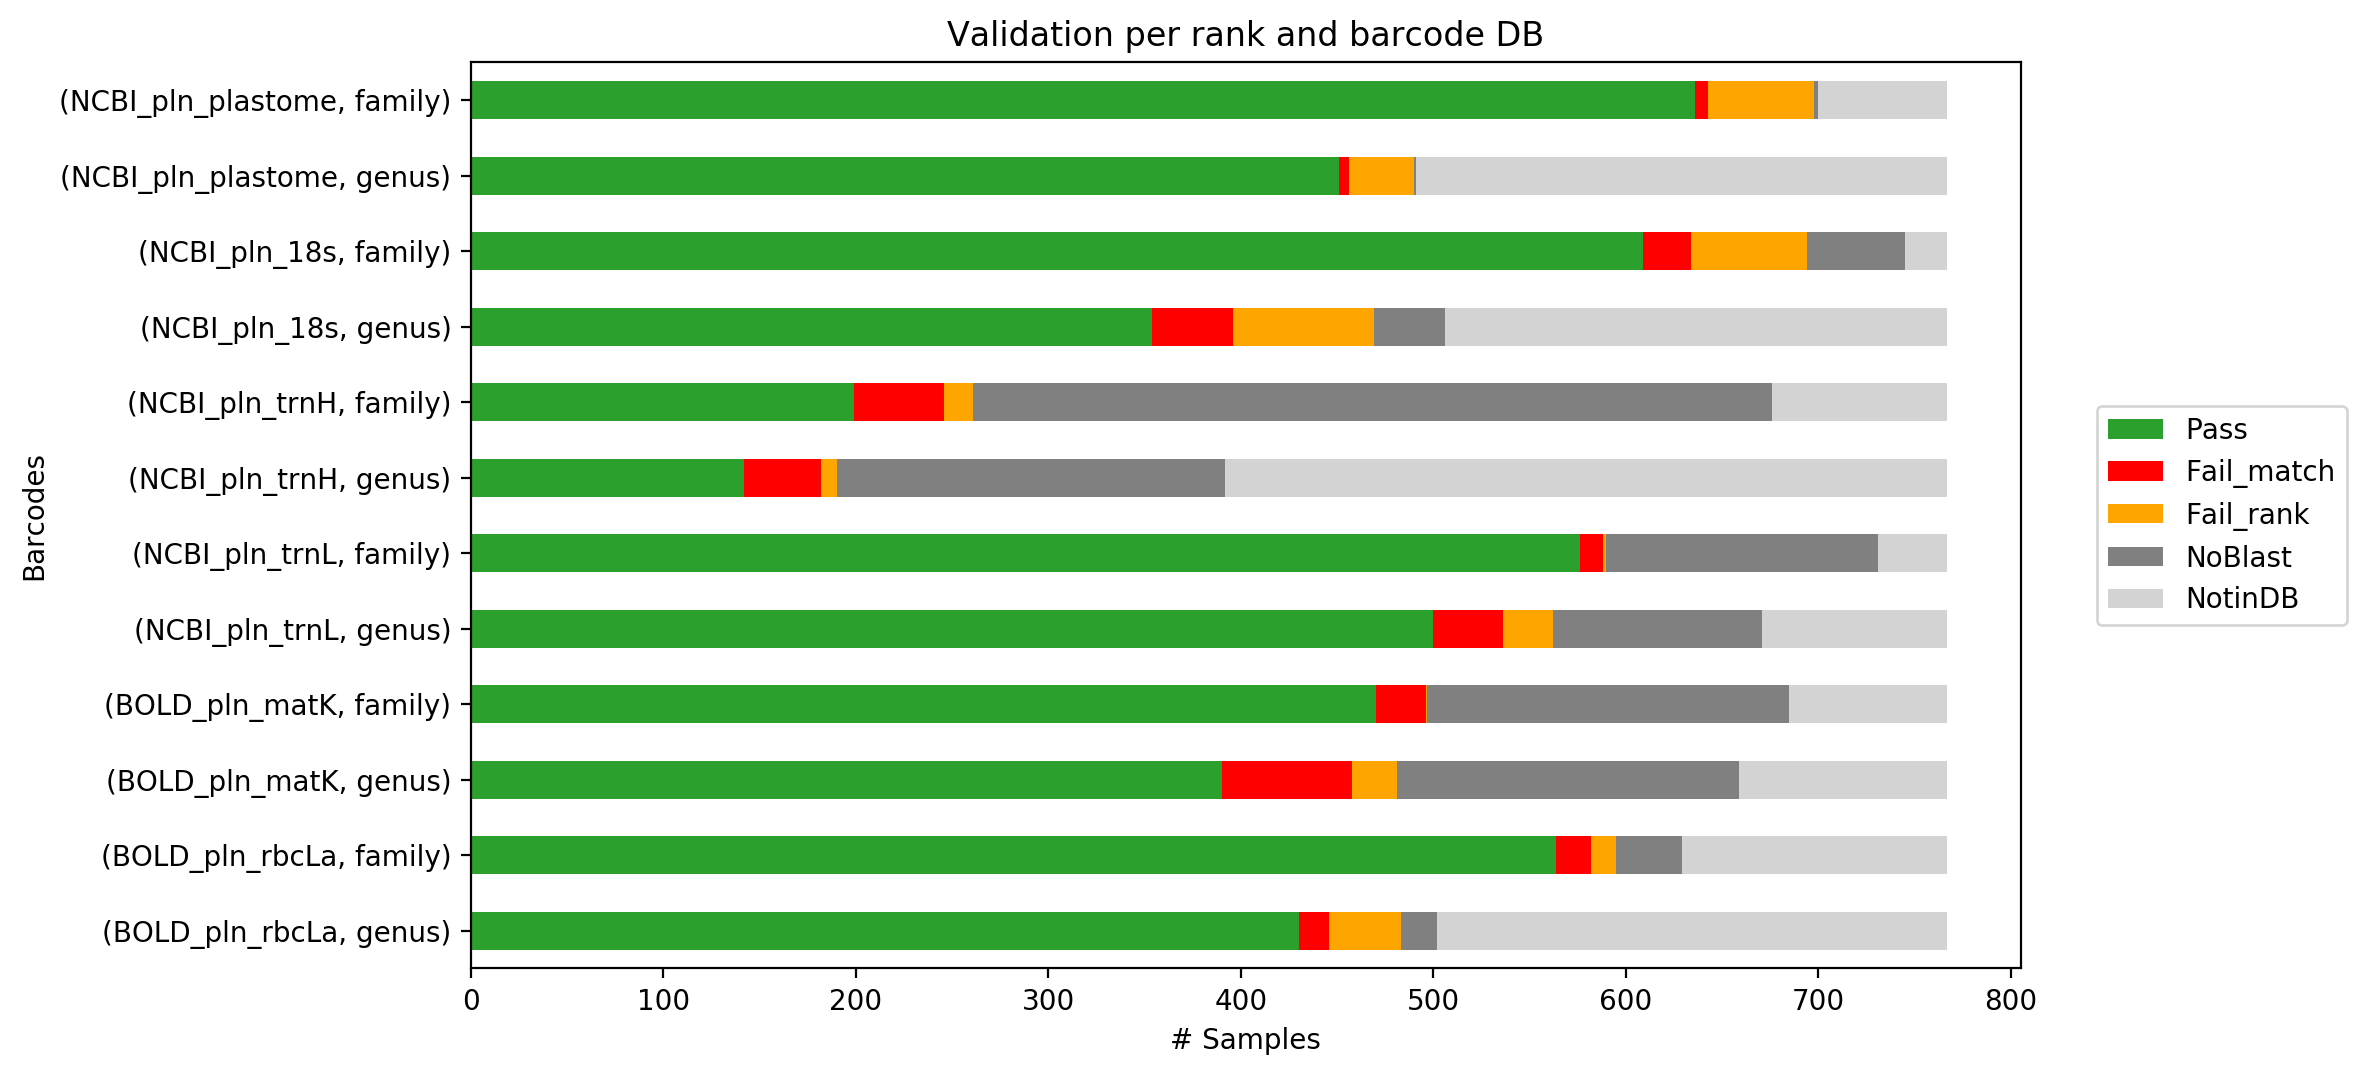

In [67]:
ax = stats_tests.set_index(['gene','rank']).plot.barh(stacked=True, 
                  color=['#2CA02C', 'r', 'orange', 'grey', 'lightgrey'])
ax.set_title('Validation per rank and barcode DB')
ax.set_ylabel('Barcodes')
ax.set_xlabel('# Samples')
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left");
pp.savefig()

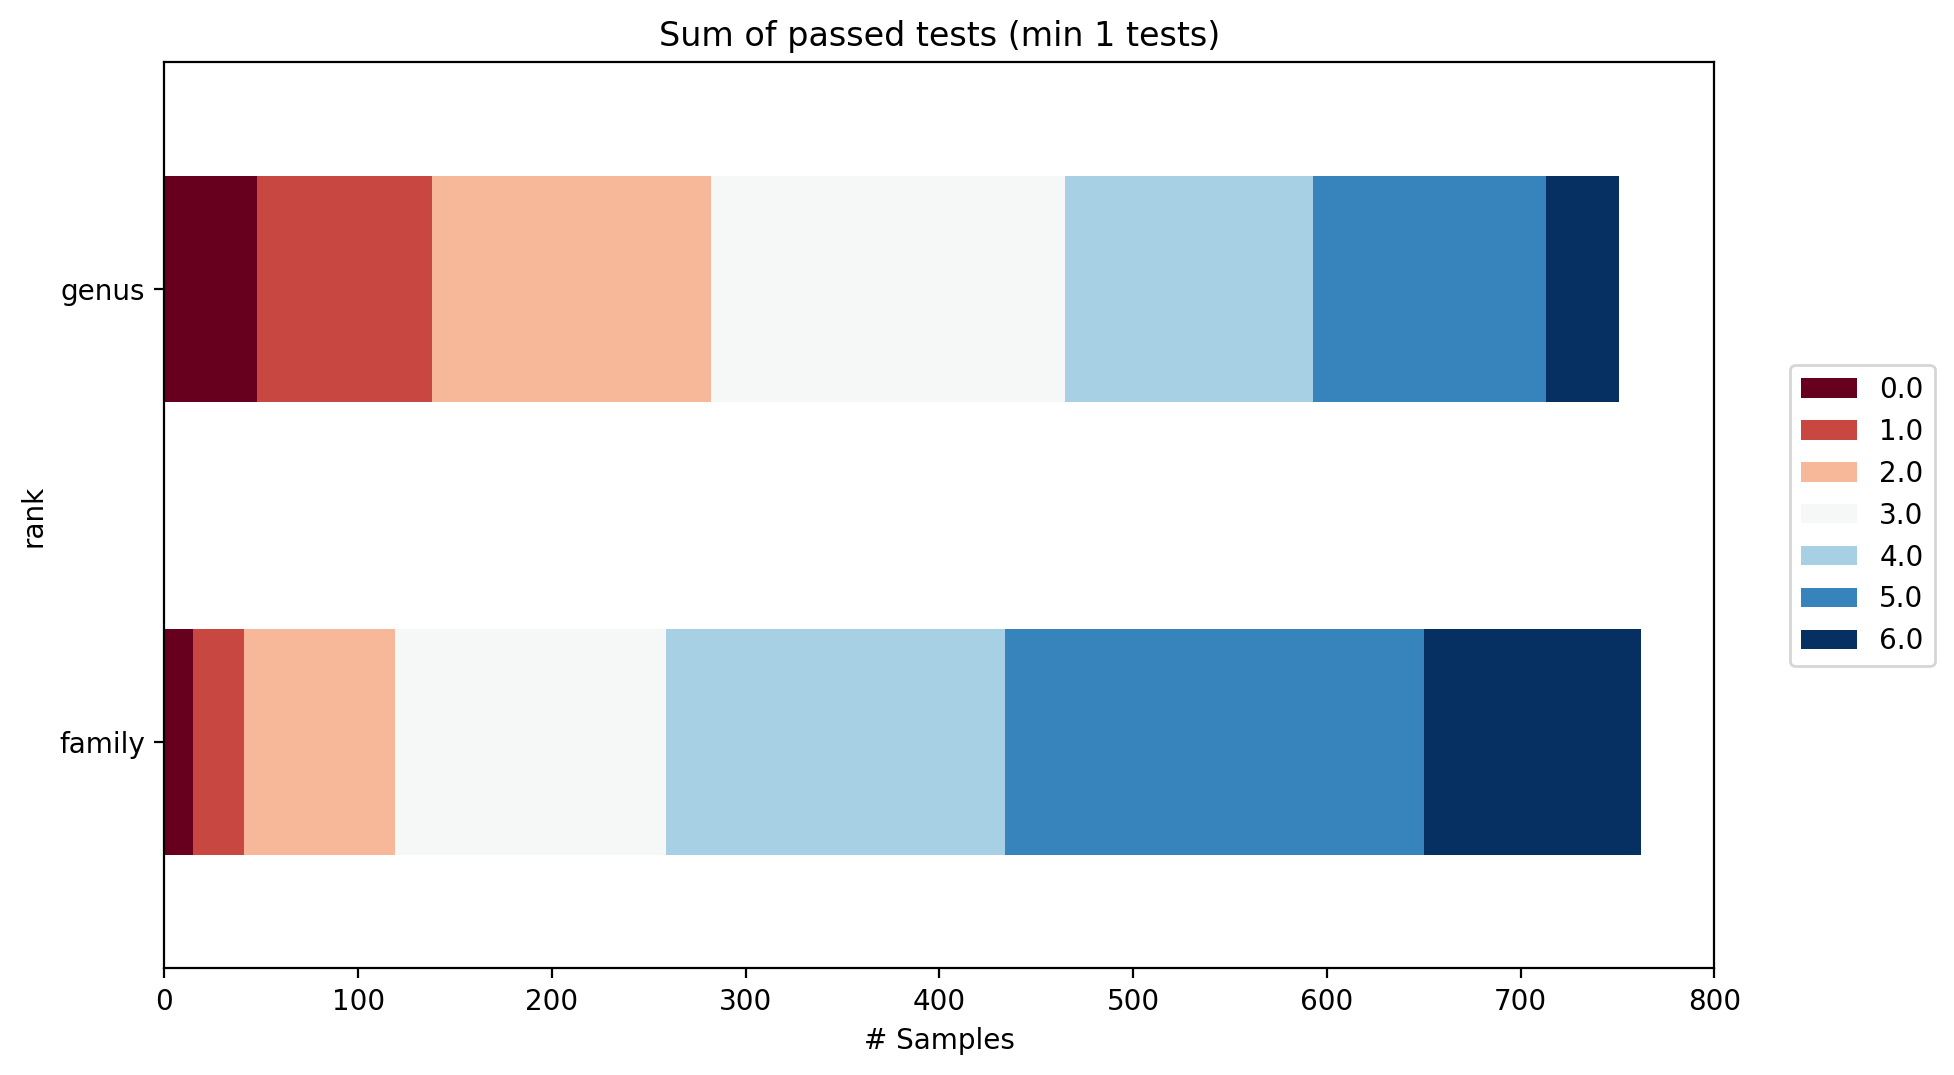

In [68]:
def count_test(df,pattern):
    col_stats = list(df.columns[df.columns.str.contains(pattern)])
    return len(col_stats) - (df[col_stats]=='NoBlast').sum(axis=1, min_count=1) - \
        (df[col_stats]=='NotinDB').sum(axis=1) 

def count_valid_test(df,pattern, min_test=1):
    col_stats = list(df.columns[df.columns.str.contains(pattern)])
    nb_valid = (df[col_stats]=='Pass').sum(axis=1)
    nb_test = count_test(df,pattern)
    nb_valid[nb_test<min_test] = np.nan
    return nb_valid


results_df['NV_gen']=count_test(results_df,'VAgen_')
results_df['NV_fam']=count_test(results_df,'VAfam_')

results_df['VAT_gen']=count_valid_test(results_df,'VAgen_', min_test=min_test)
results_df['VAT_fam']=count_valid_test(results_df,'VAfam_', min_test=min_test)

results_df['pc_Vgen']=round(results_df['VAT_gen']/results_df['NV_gen']*100,0)
results_df['pc_Vfam']=round(results_df['VAT_fam']/results_df['NV_fam']*100,0)

tmp = results_df.groupby('VAT_fam').size().to_frame().reset_index().rename(columns={'VAT_fam':'Valid',
    0:'count'}); tmp['rank']='family'; 
fam_v=tmp.pivot(index='rank', columns='Valid', values='count').reset_index()
del tmp
tmp = results_df.groupby('VAT_gen').size().to_frame().reset_index().rename(columns={'VAT_gen':'Valid',
    0:'count'}); tmp['rank']='genus'; 
gen_v=tmp.pivot(index='rank', columns='Valid', values='count').reset_index()
del tmp
all_val=pd.concat([fam_v, gen_v])

ax2 = all_val.set_index(['rank']).plot.barh(stacked=True, colormap='RdBu');
ax2.legend(bbox_to_anchor=(1.04,0.5), loc="center left");
ax2.set_title('Sum of passed tests (min ' + str(min_test) + ' tests)');
ax2.set_xlabel('# Samples');
pp.savefig()

### Validation Sub-categories

In [69]:
## Find invalid samples
def find_wrong_taxa(rdf, rank, min_test_invalid):
    rx=rank[:3]
    best_rank_cols=list(rdf.columns[rdf.columns.str.contains('best_' + rx)])
    col_keep = ['Sample','species',rank,'NV_'+rx,'VAT_'+rx,'pc_V'+rx] + best_rank_cols
    
    rank_df=rdf[col_keep]
    print(rank_df.shape[0],end=', ')
    rank_df=rank_df[rank_df['NV_'+rx]>=min_test_invalid]
    print(rank_df.shape[0],end=', ')
    #Most common taxa at best rank
    rank_df['mode']=rank_df[best_rank_cols].mode(axis='columns',dropna=True)[0]
    for idx, row in rank_df.iterrows():
        if row['mode']==row['mode']:
            rank_df.loc[idx,'mode_count' ]=sum(row[best_rank_cols]==row['mode'])
    rank_df['mode_ratio' ] = (rank_df['mode_count']/rank_df['NV_'+rx])
    
    #Remove if mode taxa is the same as the right taxa
    rank_df = rank_df[rank_df[rank]!=rank_df['mode']]
    print(rank_df.shape[0],end=', ')
    #Create table with Rejected samples
    invalid_rank = rank_df.loc[rank_df['mode_ratio']>0.5]
    print(invalid_rank.shape[0])
    
    #Check for misleading results
    misleading=invalid_rank[invalid_rank['VAT_' + rx]>0]
    if misleading.shape[0]>0:
        print('warning:',misleading.shape[0],'samples passed at least one test at',rank,'rank but have wrong mode')
        print(misleading[['Sample',rank,'NV_'+rx,'VAT_'+rx,'pc_V'+rx,'mode','mode_count','mode_ratio']])
    return invalid_rank

invalid_fam=find_wrong_taxa(results_df, rank='family', min_test_invalid=min_test_invalid)
invalid_gen=find_wrong_taxa(results_df, rank='genus', min_test_invalid=min_test_invalid)

767, 750, 26, 14
    Sample            family  NV_fam  VAT_fam  pc_Vfam     mode  mode_count  \
532   SERM         Ericaceae       3      1.0     33.0  Poaceae         2.0   
714   XXYA  Scrophulariaceae       3      1.0     33.0  Poaceae         2.0   

     mode_ratio  
532    0.666667  
714    0.666667  
767, 681, 60, 21
    Sample        genus  NV_gen  VAT_gen  pc_Vgen     mode  mode_count  \
162   EYKJ      Silybum       5      4.0     80.0  Cirsium         3.0   
296   JNKW    Cicerbita       2      1.0     50.0  Lactuca         2.0   
392   NHUA     Castanea       4      1.0     25.0  Quercus         3.0   
657   WHNV  Clinopodium       4      2.0     50.0   Mentha         3.0   

     mode_ratio  
162        0.60  
296        1.00  
392        0.75  
657        0.75  


In [70]:
## Vfam_Vgen: Valid Genus and Family. Genus and Family are both correct in at least one test 
## Vfam_Rgen: Rejected Genus, Valid Family. Family is correct in at least one test, 
# but genus is wrong and matches to the same wrong genus in >50% of tests. Needs at least 2 tests at genus level
## Vfam_Igen: Inconclusive Genus, Valid Family. Family is correct in at least one test, but genus is uncertain
## Rfam_Rgen: Rejected Genus, Rejected Family. Family and genus are both wrong,
# and match to the same wrong family/genus in >50% of tests. Needs at least 2 tests at each level
## Rfam_Igen: Inconclusive Genus, Rejected Family. Family is wrong in >50% of tests. Needs at least 2 tests at family level
## Ifam_Igen: Inconclusive Genus, Inconclusive Family. Sample did not fall in previous categories, 
# Either because it had no blast matches and/or because it is not in any database
results_df['Vsubcat']=np.nan

##Vfam_Vgen
for gene in genes_df.gene:
    results_df['Valid_FamGen_' + gene] = (results_df['VAgen_' + gene]=='Pass') & (results_df['VAfam_' + gene]=='Pass')
results_df['Valid_FamGen']=results_df[list(results_df.columns[results_df.columns.str.contains('Valid_FamGen_')])].sum(axis=1)>=1
results_df.loc[results_df['Valid_FamGen']==True,'Vsubcat']='Vfam_Vgen'
## Vfam_Ugen
results_df.loc[(results_df['VAT_fam']>0) & (results_df.Sample.isin(invalid_gen.Sample)==True),'Vsubcat']='Vfam_Rgen'
## Vfam_Igen
results_df.loc[(results_df['VAT_fam']>0) & (results_df.Vsubcat.isna()==True),'Vsubcat']='Vfam_Igen'
## Rfam_Rgen
results_df.loc[(results_df.Sample.isin(invalid_gen.Sample)==True) & (results_df.Sample.isin(invalid_fam.Sample)==True),
               'Vsubcat']='Rfam_Rgen'
## Rfam_Igen
results_df.loc[(results_df.Sample.isin(invalid_fam.Sample)==True) & (results_df.Vsubcat.isna()==True),
               'Vsubcat']='Rfam_Igen'
## Ifam_Igen
results_df.loc[(results_df.Vsubcat.isna()==True),'Vsubcat']='Ifam_Igen'
print(results_df.Vsubcat.notnull().sum())
results_df.groupby('Vsubcat').size()

767


Vsubcat
Ifam_Igen      8
Rfam_Igen      4
Rfam_Rgen      8
Vfam_Igen     35
Vfam_Rgen     13
Vfam_Vgen    699
dtype: int64

### Main Validation Categories

In [71]:
results_df['Validation']=np.nan
## Confirmed = Vfam_Vgen + Vfam_Rgen + Vfam_Igen
results_df.loc[(results_df['Vsubcat']=='Vfam_Vgen') | (results_df['Vsubcat']=='Vfam_Rgen') | 
               (results_df['Vsubcat']=='Vfam_Igen'),'Validation']='Confirmed'
## Rejected = Rfam_Rgen + Rfam_Igen
results_df.loc[(results_df['Vsubcat']=='Rfam_Rgen') | (results_df['Vsubcat']=='Rfam_Igen'),'Validation']='Rejected'
## Inconclusive = Ifam_Igen
results_df.loc[(results_df['Vsubcat']=='Ifam_Igen'),'Validation']='Inconclusive'

print(results_df.Validation.notnull().sum())
results_df.groupby('Validation').size()

767


Validation
Confirmed       747
Inconclusive      8
Rejected         12
dtype: int64

Validation  Confirmed  Inconclusive  Rejected
0                 747             8        12


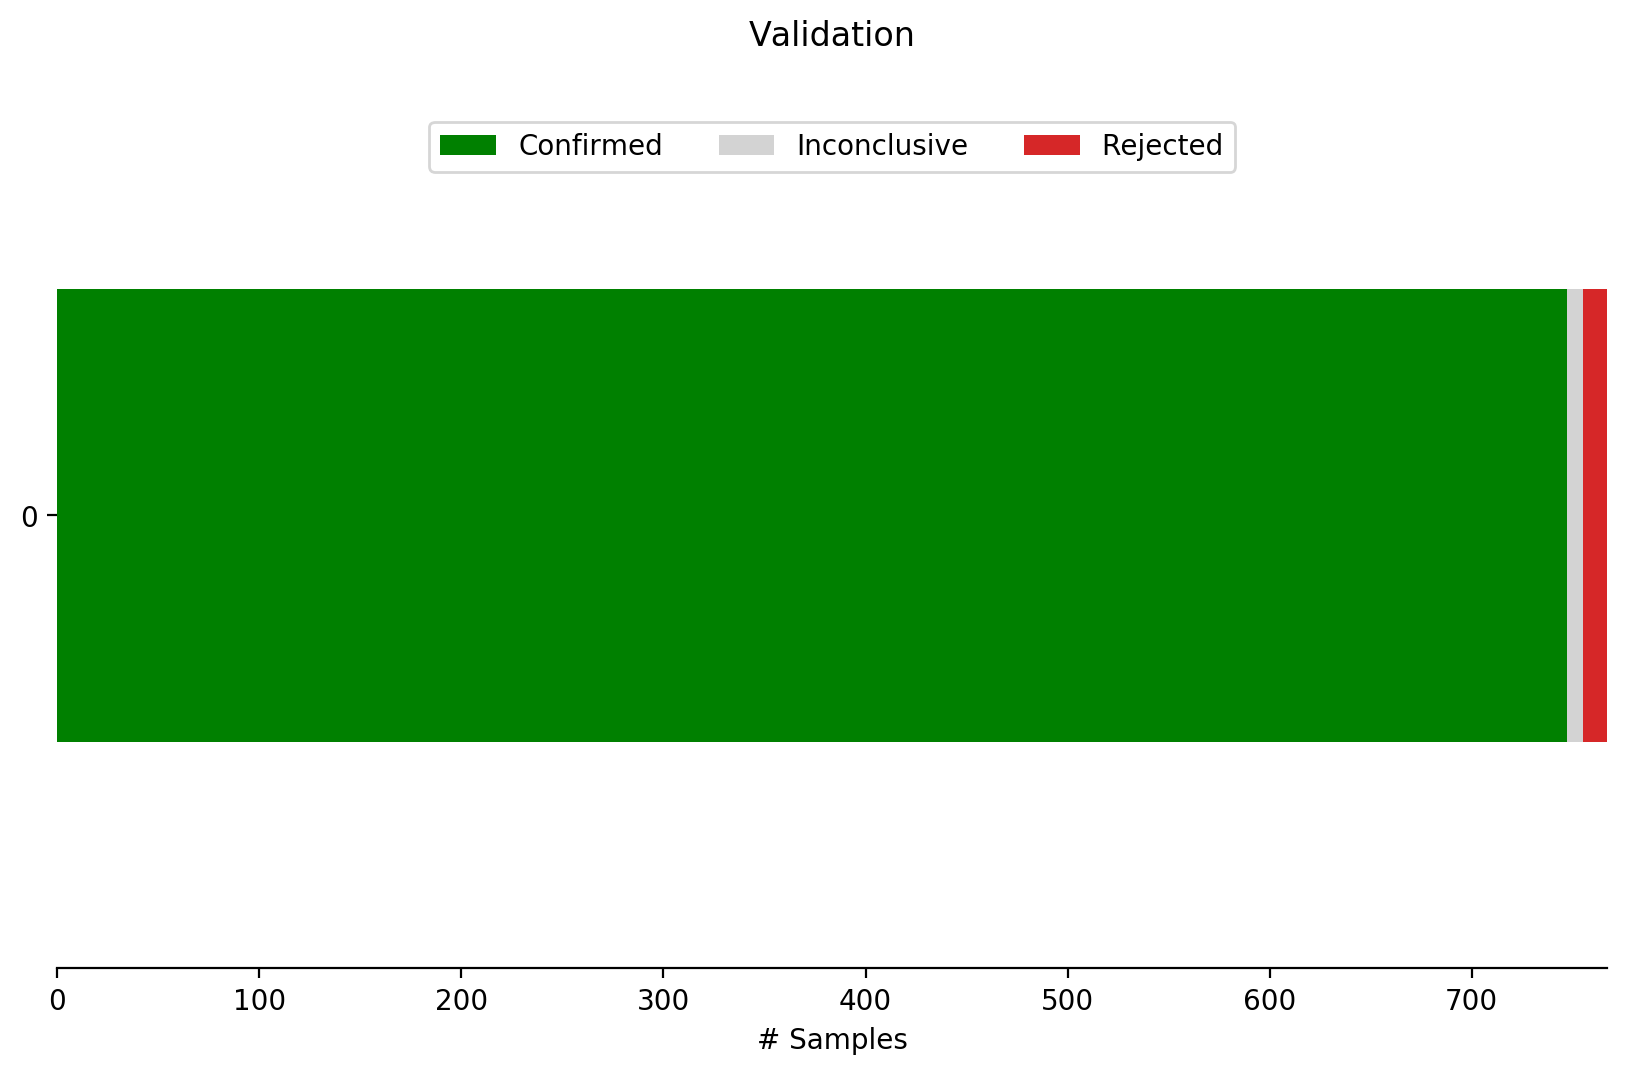

In [72]:
cat_df=results_df.groupby('Validation').size().to_frame().sort_values('Validation',ascending=False)\
    .reset_index().rename(columns={0:'count'})
cat_df['Validation_cat']='';
cat_df= cat_df.pivot(index='Validation_cat',columns='Validation', values='count').reset_index().drop(columns='Validation_cat')
print(cat_df)
ax = cat_df.plot.barh(stacked=True, xlim=[0,results_df.shape[0]],
        color=['green','lightgrey','#d62728'])
ax.set_title('Validation')
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False); ax.spines['left'].set_visible(False)
ax.set_xlabel('# Samples')
ax.legend(bbox_to_anchor=(0.5,0.95), loc="upper center", ncol=int(cat_df.shape[1]));
pp.savefig()

Vsubcat  Vfam_Vgen  Vfam_Rgen  Vfam_Igen  Rfam_Rgen  Rfam_Igen  Ifam_Igen
0              699         13         35          8          4          8


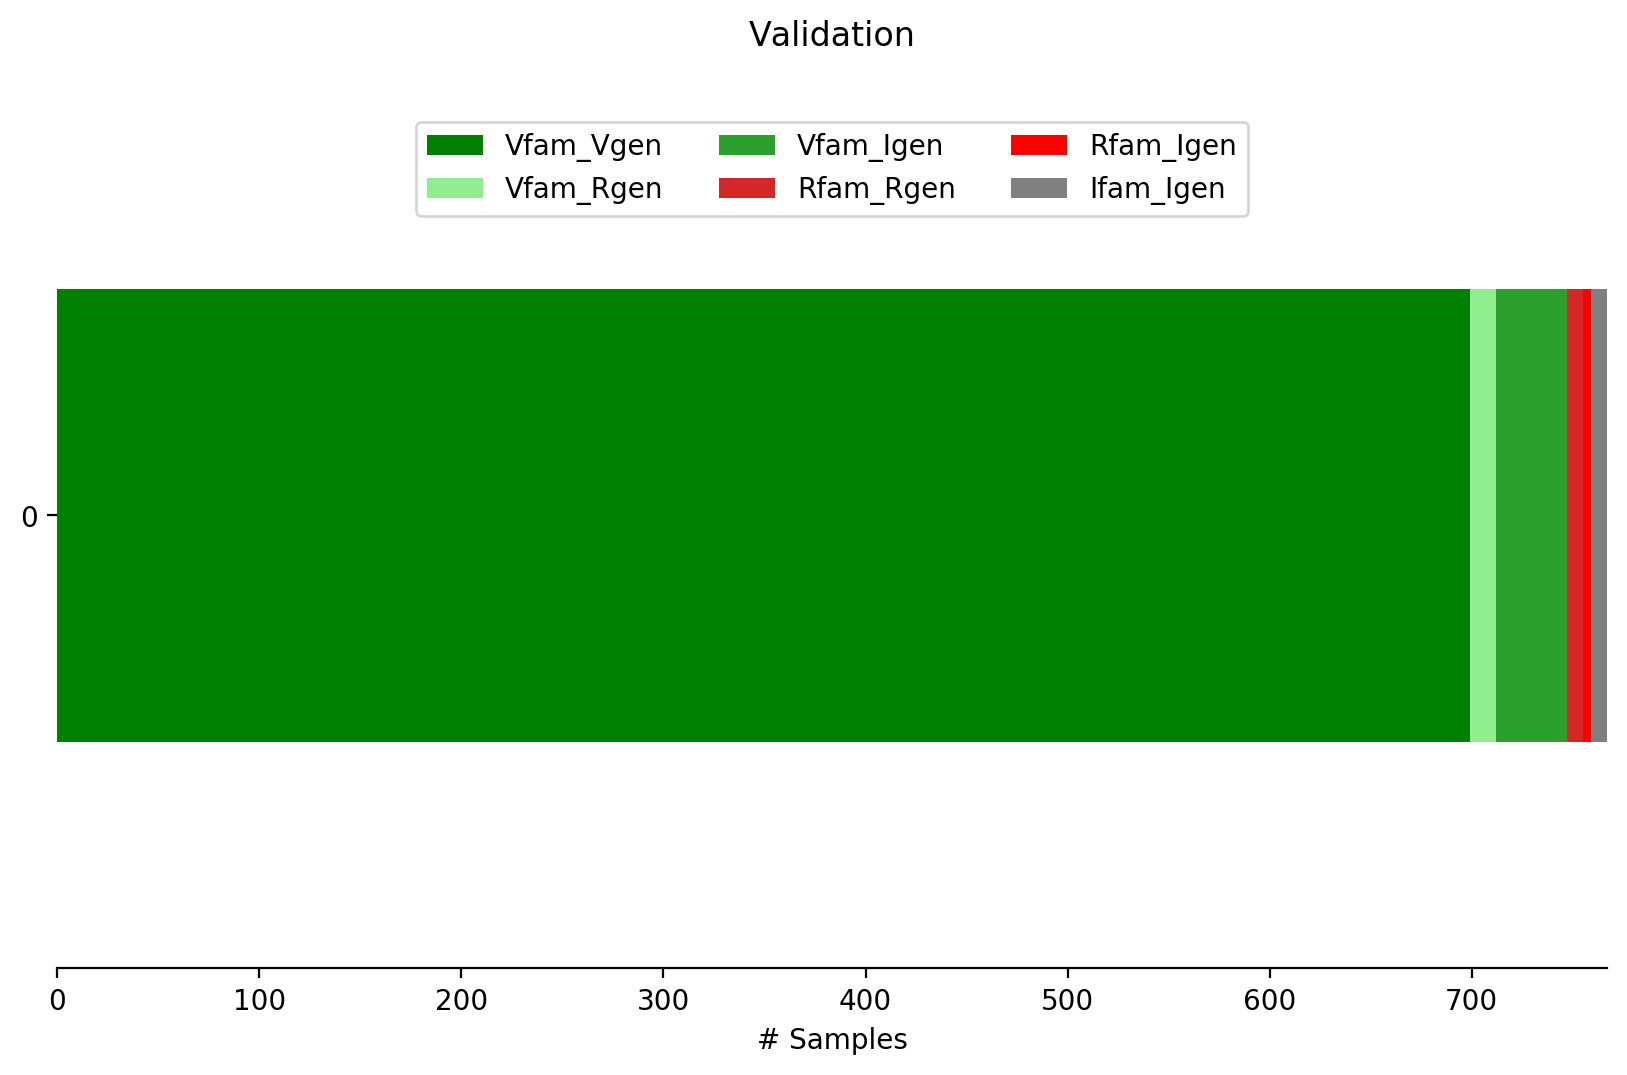

In [73]:
subcat_df=results_df.groupby('Vsubcat').size().to_frame().reset_index().rename(columns={0:'count'})
subcat_df['Val']='';
subcat_df= subcat_df.pivot(index='Val',columns='Vsubcat', values='count').reset_index().drop(columns='Val')
subcat_df=subcat_df[subcat_df.columns[::-1]]
print(subcat_df)
ax = subcat_df.plot.barh(stacked=True, xlim=[0,results_df.shape[0]],
        color=['green','lightgreen','#2CA02C','#d62728','red','grey'])
ax.set_title('Validation')
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False); ax.spines['left'].set_visible(False)
ax.set_xlabel('# Samples')
ax.legend(bbox_to_anchor=(0.5,0.95), loc="upper center", ncol=int(subcat_df.shape[1]/2));
pp.savefig()

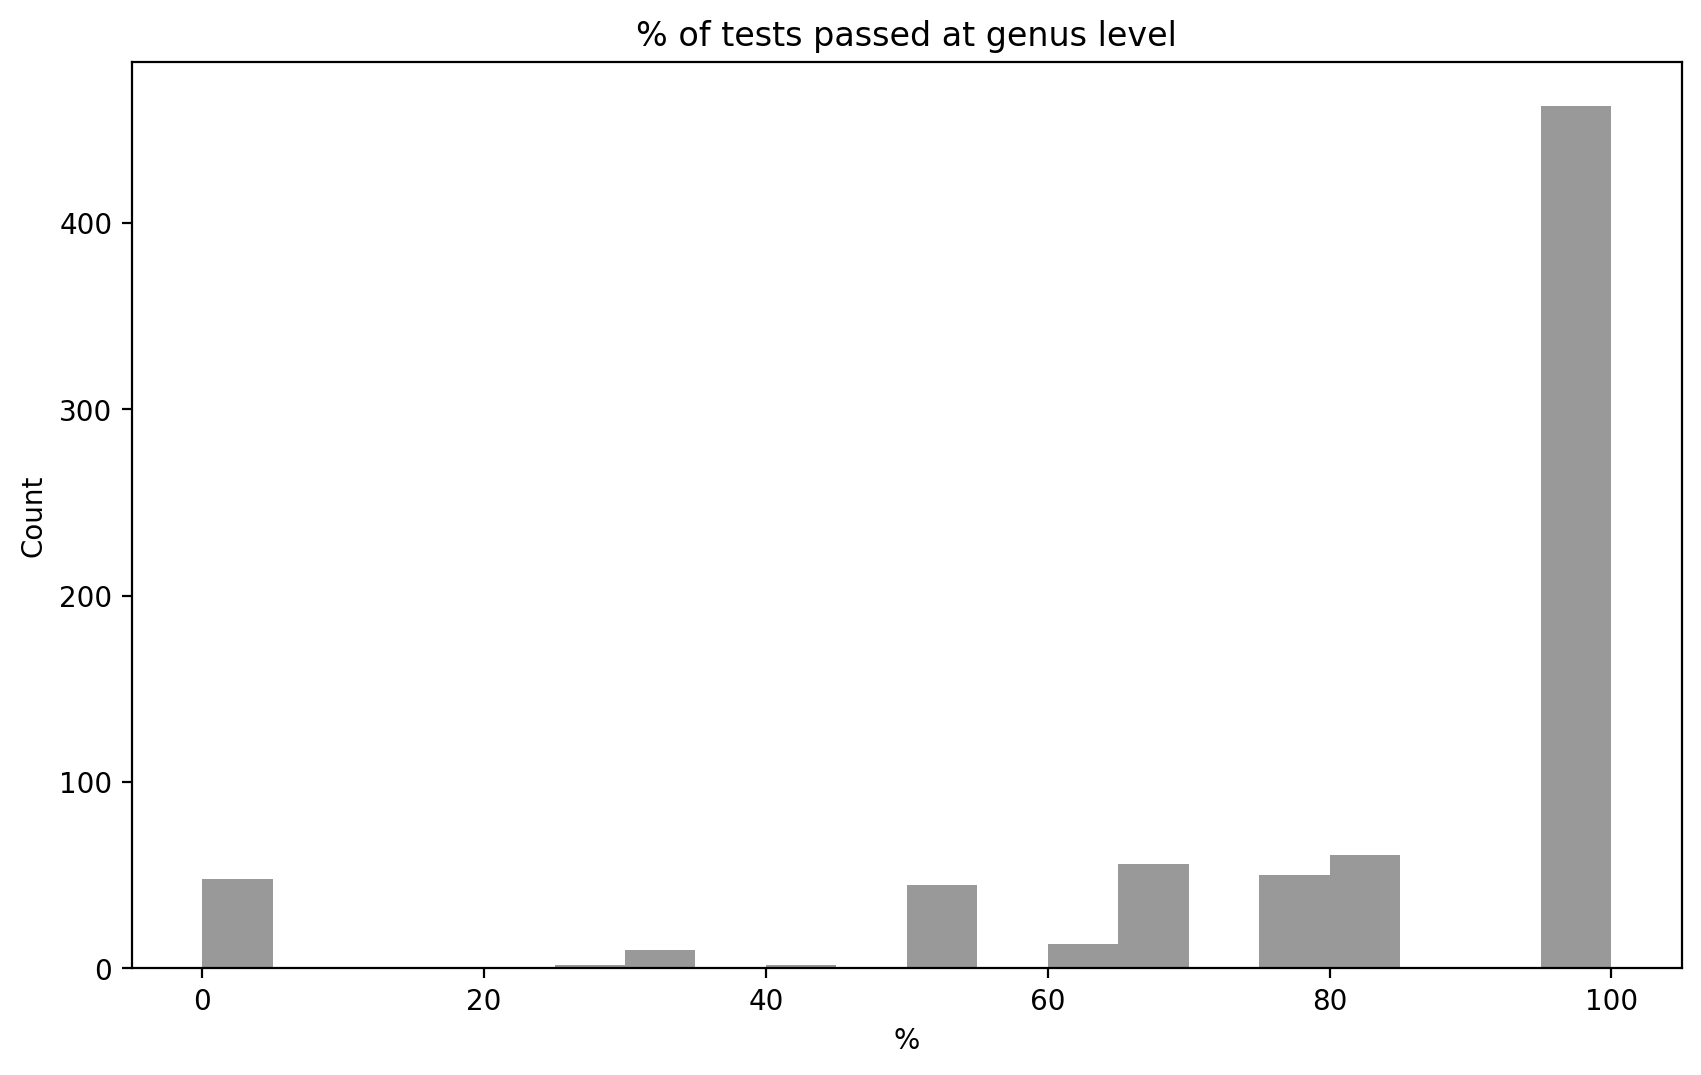

In [74]:
sns.distplot(results_df['pc_Vgen'],kde=False, bins=20, color='k');
plt.title("% of tests passed at genus level")
plt.ylabel("Count");
plt.xlabel("%");
pp.savefig()

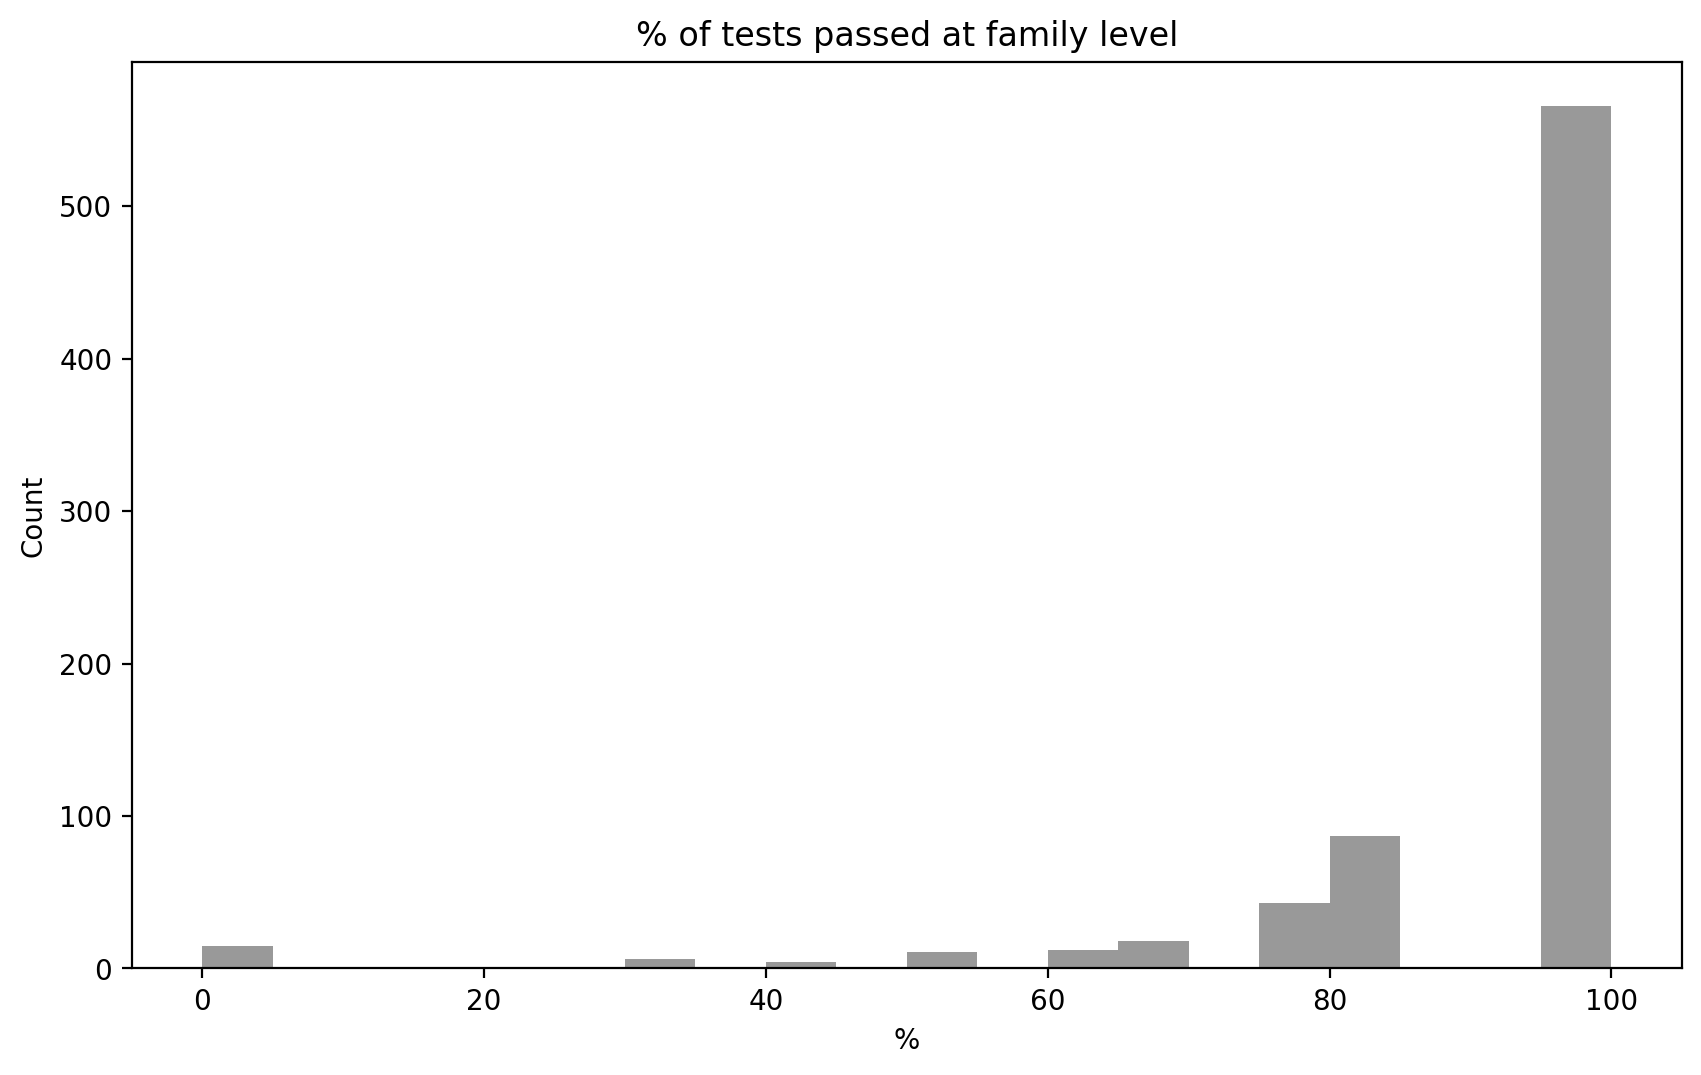

In [75]:
sns.distplot(results_df['pc_Vfam'],kde=False, bins=20, color='k');
plt.title("% of tests passed at family level")
plt.ylabel("Count");
plt.xlabel("%");
pp.savefig()

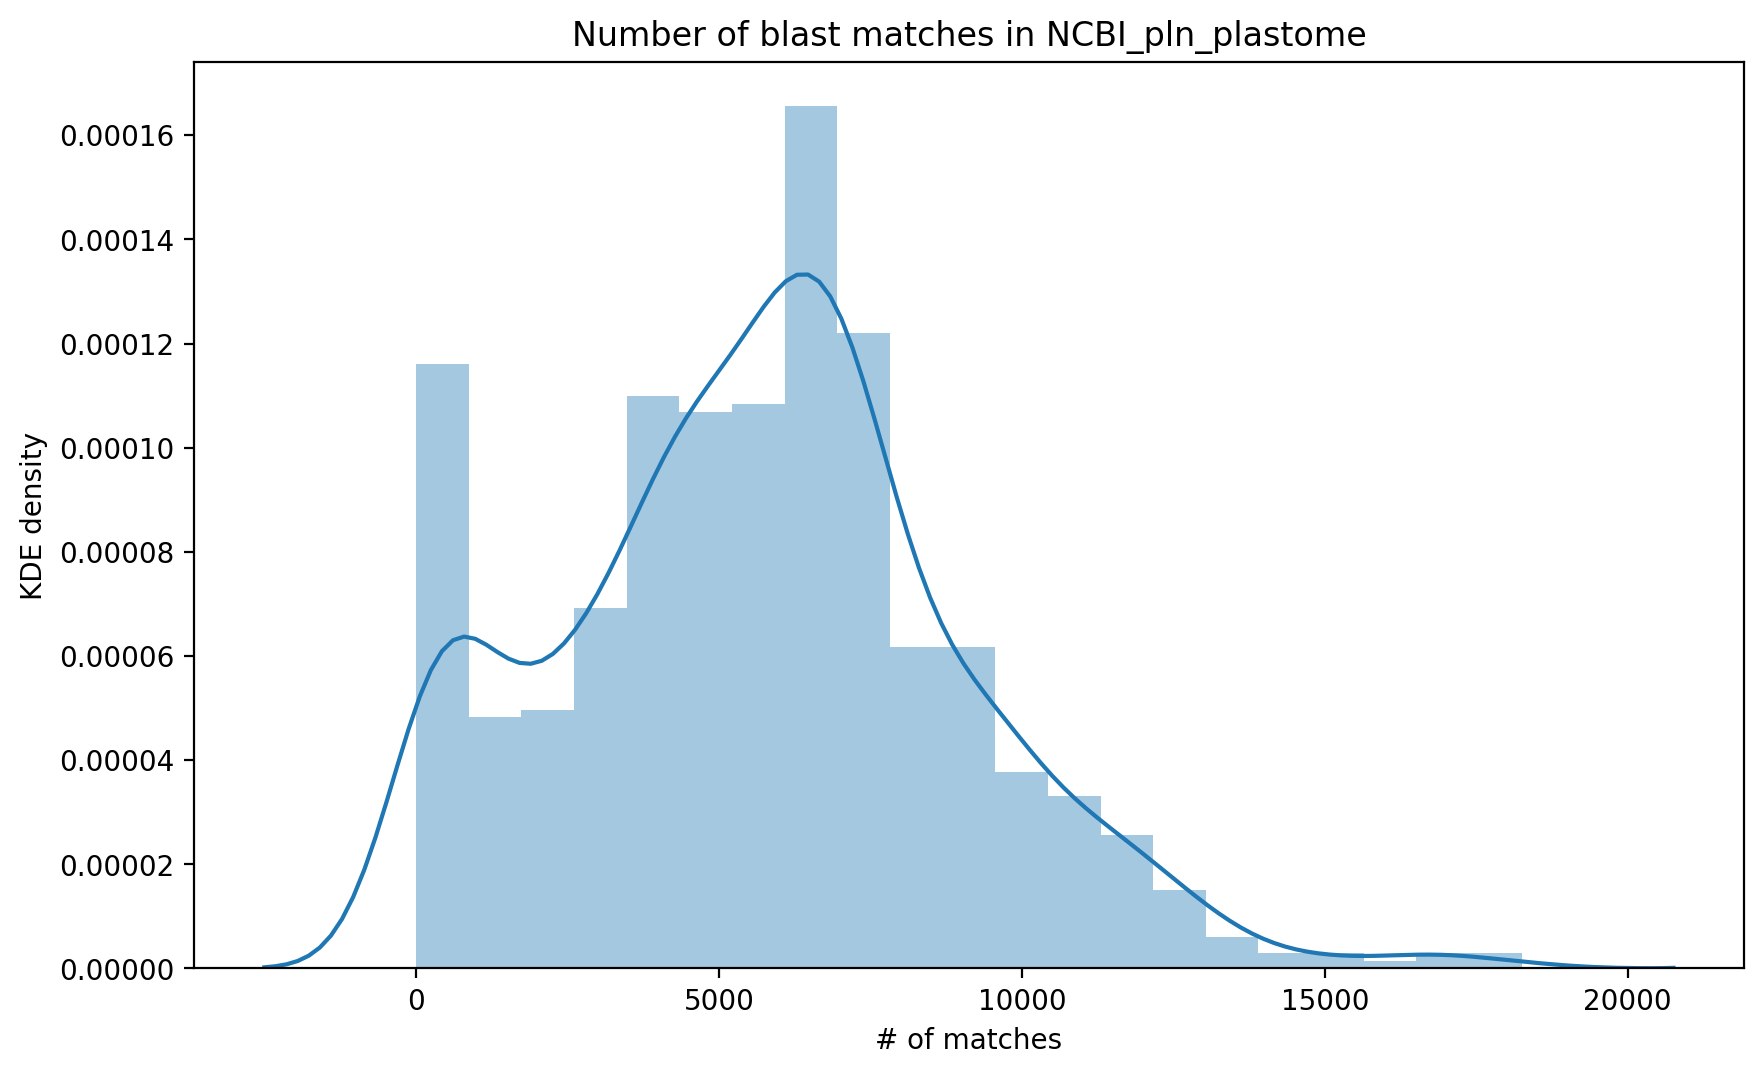

In [76]:
sns.distplot(results_df['Nmatch_NCBI_pln_plastome'],kde=True);
plt.title("Number of blast matches in NCBI_pln_plastome")
plt.ylabel("KDE density");
plt.xlabel("# of matches");
pp.savefig()

In [77]:
# for gene in genes_df[:5].gene:
#     sns.distplot(results_df['Nmatch_' + gene],kde=True);
# plt.title("Number of blast matches (except clpt)")
# plt.ylabel("KDE density");
# plt.xlabel("# of matches");
# pp.savefig()

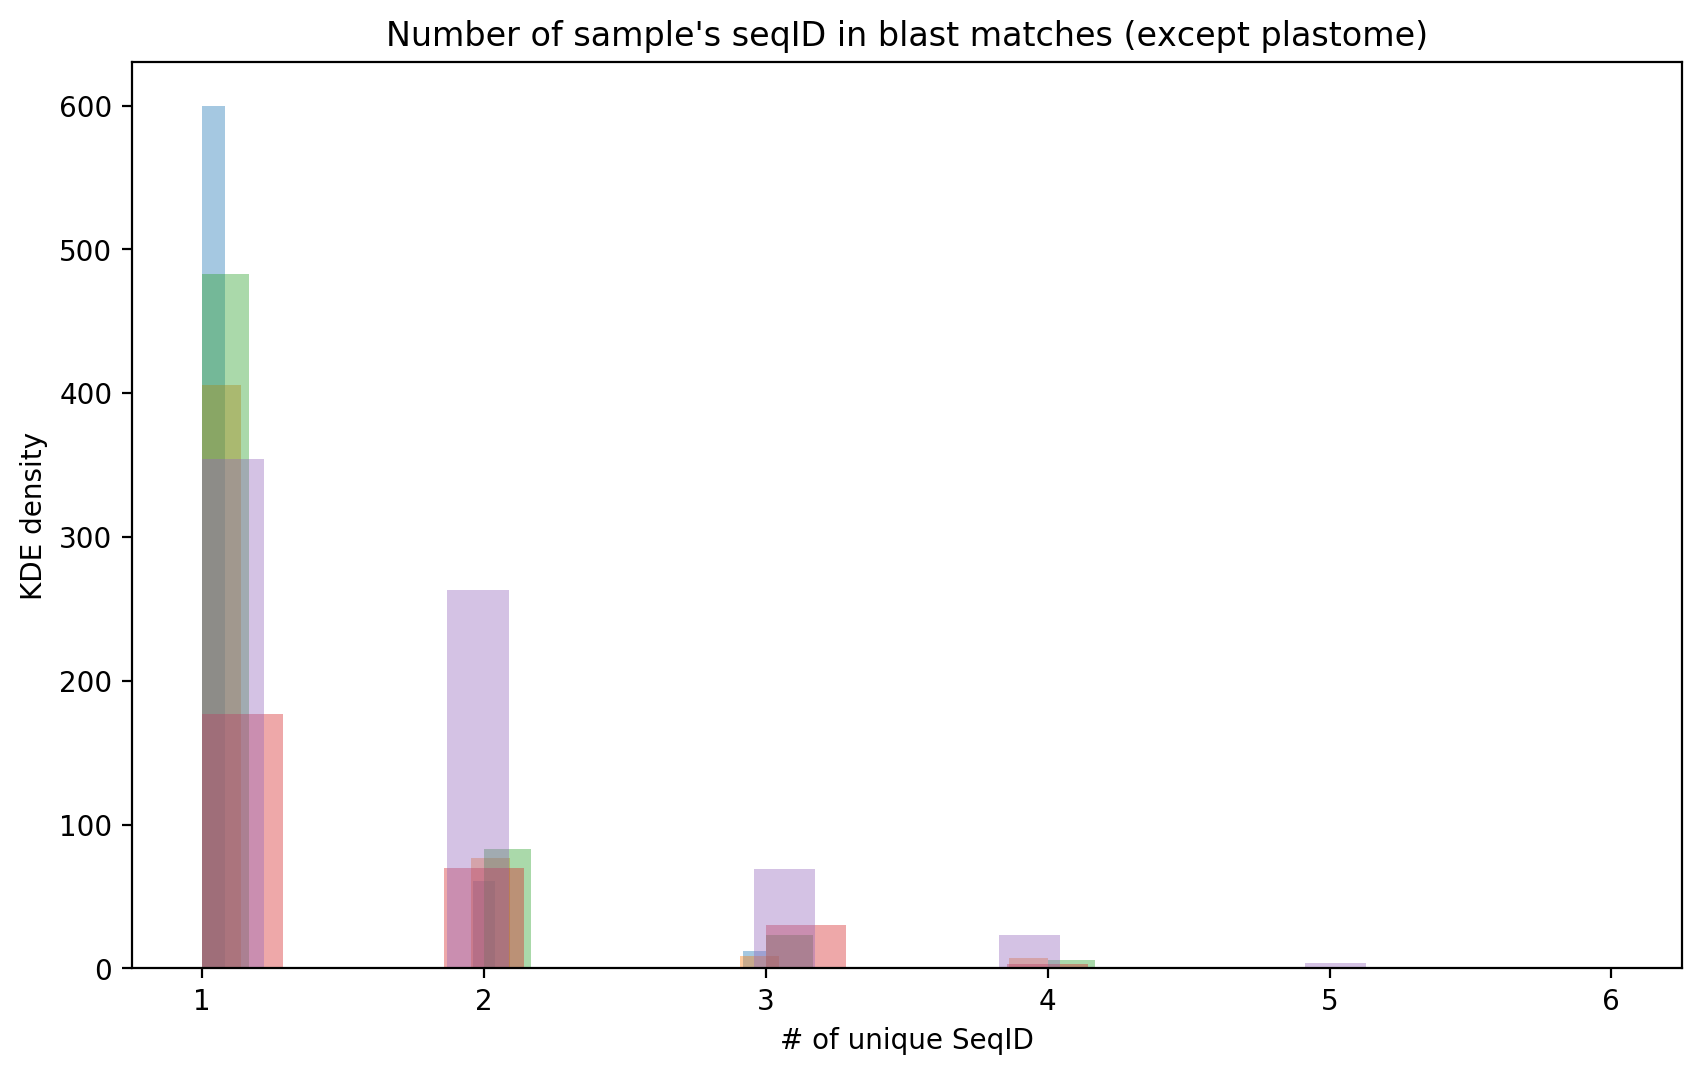

In [78]:
for gene in genes_df[:5].gene:
    sns.distplot(results_df['NseqID_' + gene],kde=False);
plt.title("Number of sample's seqID in blast matches (except plastome)")
plt.ylabel("KDE density");
plt.xlabel("# of unique SeqID");
pp.savefig()

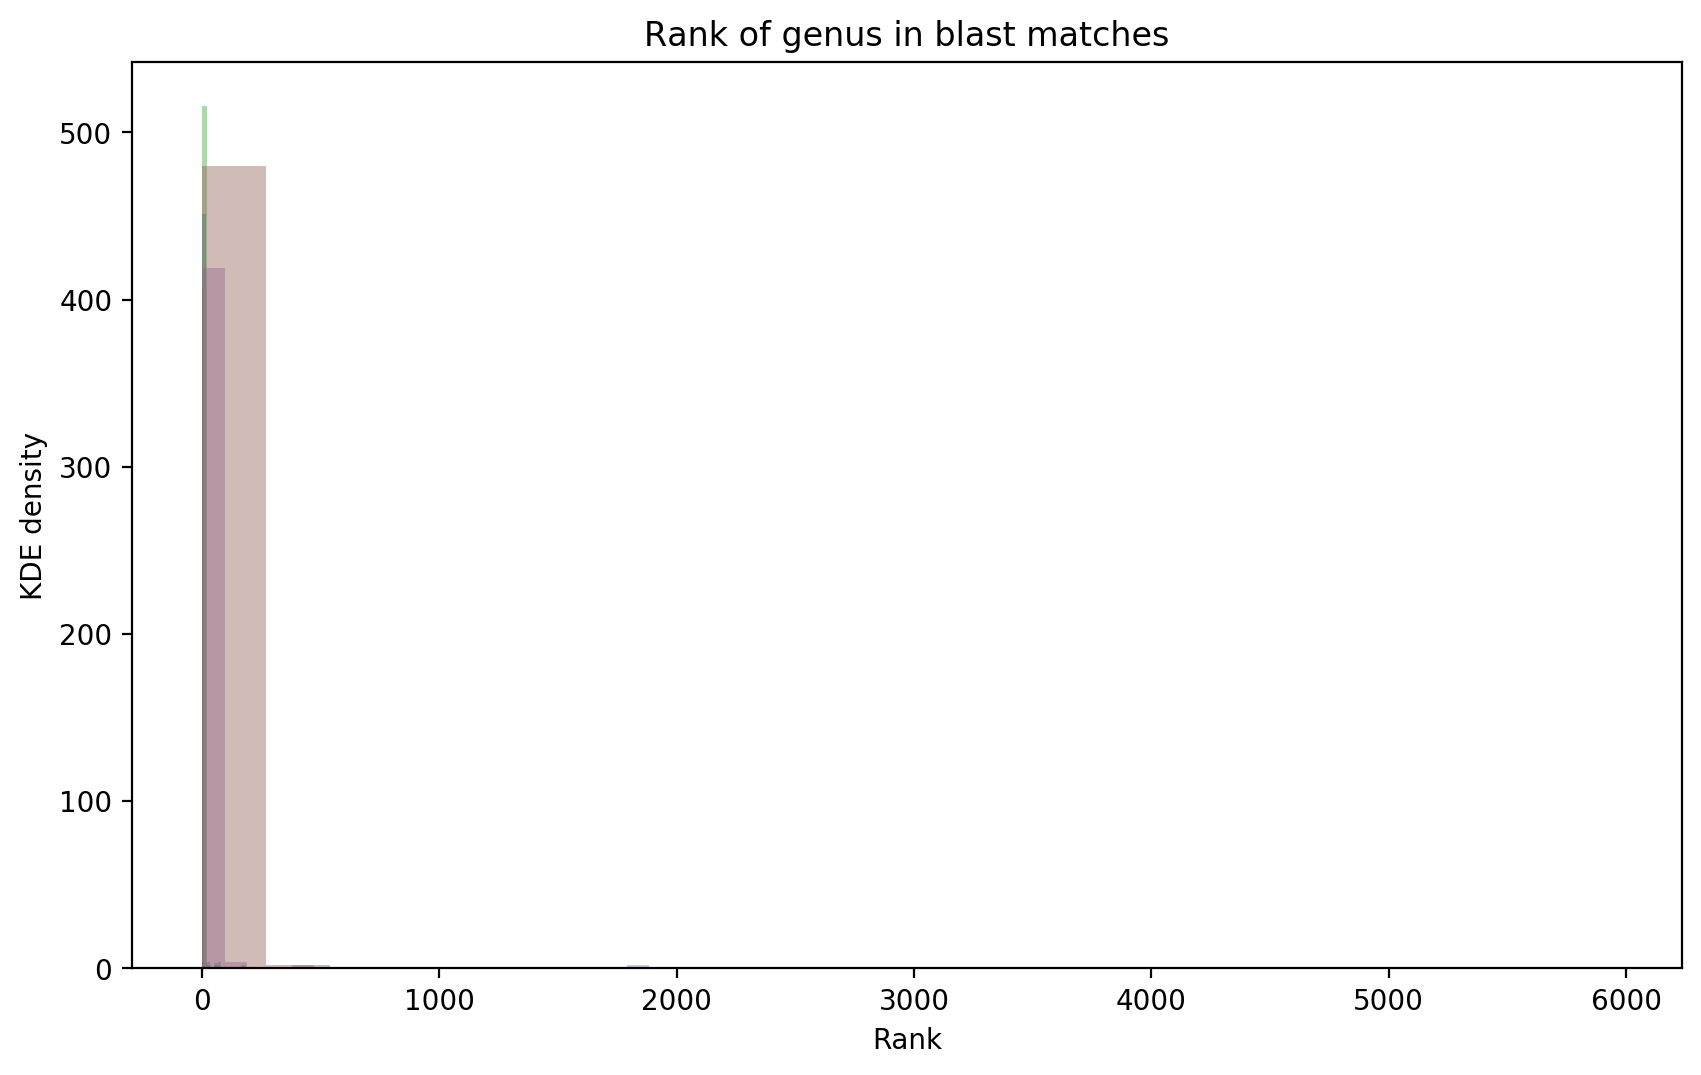

In [79]:
for gene in genes_df.gene:
    sns.distplot(results_df['gen' + '_rank_' + gene],kde=False);
plt.title("Rank of genus in blast matches")
plt.ylabel("KDE density");
plt.xlabel("Rank");
pp.savefig()

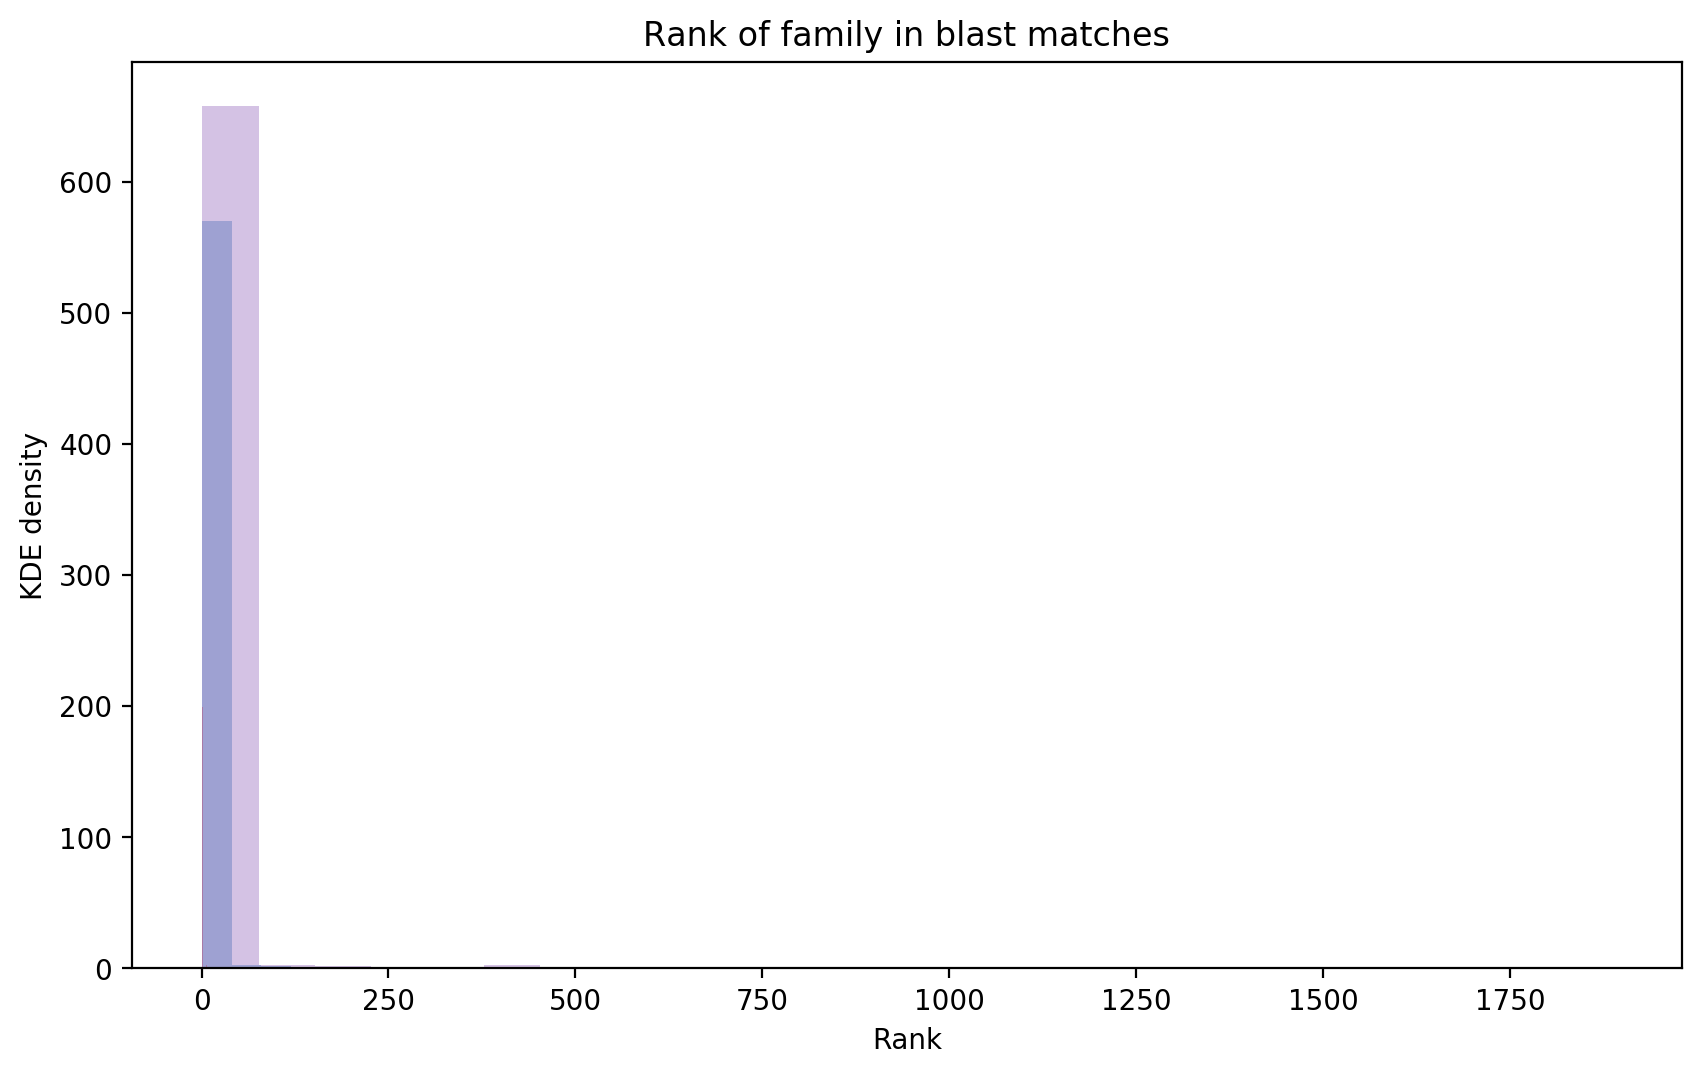

In [80]:
for gene in genes_df[:5].gene:
    sns.distplot(results_df['fam' + '_rank_' + gene],kde=False);
plt.title("Rank of family in blast matches")
plt.ylabel("KDE density");
plt.xlabel("Rank");
pp.savefig()

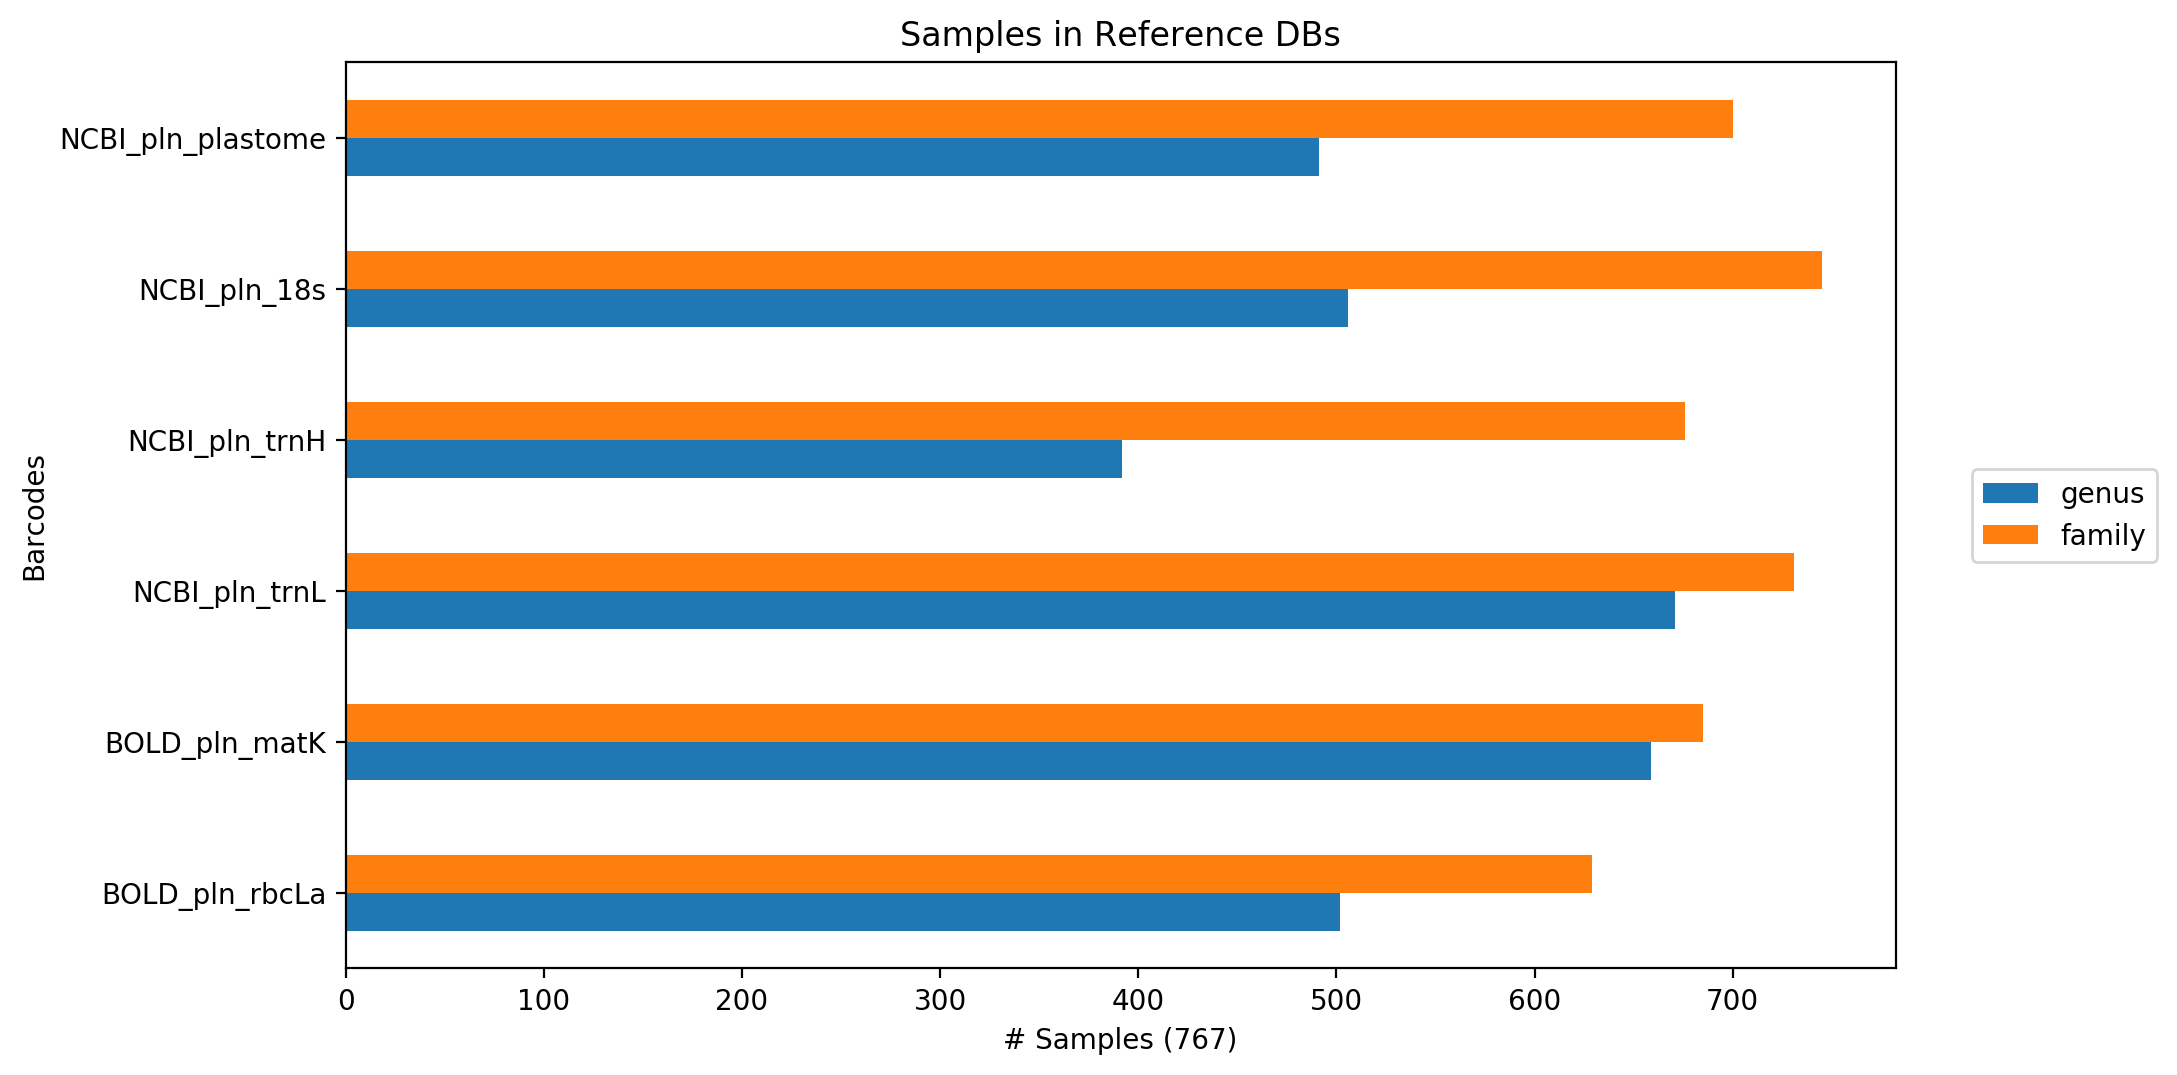

In [81]:
ax = genes_df[['gene', 'NSample_genus_inDB', 'NSample_family_inDB']]\
    .rename(columns={'NSample_genus_inDB':'genus','NSample_family_inDB':'family'})\
    .set_index(['gene']).plot.barh(stacked=False)
ax.set_title('Samples in Reference DBs')
ax.set_ylabel('Barcodes')
ax.set_xlabel('# Samples (' + str(results_df.shape[0]) + ')')
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left");
pp.savefig()

In [82]:
pp.close()

# Tables

In [83]:
col_vat = list(results_df.columns[results_df.columns.str.contains('VAT')])
col_nv = list(results_df.columns[results_df.columns.str.contains('NV_')])
col_pc = list(results_df.columns[results_df.columns.str.contains('pc_V')])
valid_col = sdf_col_keep + col_vat + col_nv + col_pc + ['Validation','Vsubcat']
valid_df = results_df[valid_col]
print(valid_df.shape)

(767, 22)


In [84]:
# # Make table with invalid samples
# col_best = list(results_df.columns[results_df.columns.str.contains('best')]); col_best = sorted(col_best,reverse=False)
# invalid_col = sdf_col_keep + col_best + col_vat + col_nv + col_pc
# invalid_df = results_df[invalid_col]
# invalid_fam_old = invalid_df[invalid_df['pc_Vfam'] == 0]
# print(invalid_fam_old.shape)
# invalid_gen_old = invalid_df[invalid_df['pc_Vgen'] == 0]
# print(invalid_gen_old.shape)

In [85]:
cat_df=results_df.groupby(['Validation','Vsubcat']).size().to_frame().sort_values('Validation',ascending=False)\
    .reset_index().rename(columns={0:'count'})

In [88]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(project_name + '/' + project_name + '_Barcoding_Validation_TablesN.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
results_df.to_excel(writer, sheet_name='All_Results',index=False)
valid_df.to_excel(writer, sheet_name='Validation_Results',index=False)
invalid_fam.to_excel(writer, sheet_name='Wrong_family',index=False)
invalid_gen.to_excel(writer, sheet_name='Wrong_genus',index=False)
stats_tests.to_excel(writer, sheet_name='Test_stats',index=False)
cat_df.to_excel(writer, sheet_name='Validation_stats',index=False)
genes_df.to_excel(writer, sheet_name='BarcodeDB_stats',index=False)
# invalid_fam_old.to_excel(writer, sheet_name='Invalid_fam(old)',index=False)
# invalid_gen_old.to_excel(writer, sheet_name='Invalid_gen(old)',index=False)
# stats_df.to_excel(writer, sheet_name='Stats')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [89]:
import os
os.system('jupyter nbconvert --to html --output ' 
          + project_name + '/' + project_name + '_Results_Notebook Barcoding_Results_v0.7.ipynb')

0